In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re

import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize
from nltk import pos_tag
nltk.download('stopwords')
from nltk.corpus import stopwords
nltk.download('wordnet')
from nltk.corpus import wordnet
nltk.download('averaged_perceptron_tagger')
nltk.download('state_union')

[nltk_data] Downloading package punkt to /Users/ceciliali/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/ceciliali/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/ceciliali/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/ceciliali/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package state_union to
[nltk_data]     /Users/ceciliali/nltk_data...
[nltk_data]   Package state_union is already up-to-date!


True

In [2]:
# Read the script
script = pd.read_csv('avengers.csv')
script.head()

Unnamed: 0       character  \
0        3194       THE OTHER   
1        3195  INTERCOM VOICE   
2        3196       NICK FURY   
3        3197    PHIL COULSON   
4        3198       NICK FURY   

                                                line         movie  
0  The Tesseract has awakened. It is on a little ...  The Avengers  
1  All personnel, evacuation order has been confi...  The Avengers  
2                                     How bad is it?  The Avengers  
3  That’s the problem, sir. We don’t know. Doctor...  The Avengers  
4   NASA didn’t authorize Selvig could go to test B.  The Avengers

In [3]:
script = script.drop(['movie'], axis=1)
script.head()

Unnamed: 0       character  \
0        3194       THE OTHER   
1        3195  INTERCOM VOICE   
2        3196       NICK FURY   
3        3197    PHIL COULSON   
4        3198       NICK FURY   

                                                line  
0  The Tesseract has awakened. It is on a little ...  
1  All personnel, evacuation order has been confi...  
2                                     How bad is it?  
3  That’s the problem, sir. We don’t know. Doctor...  
4   NASA didn’t authorize Selvig could go to test B.

In [4]:
script = script.rename(columns={'Unnamed: 0': 'lineNum'})
# Reset lineNum
script['lineNum'] = np.arange(1, len(script)+1)
script.head()

lineNum       character                                               line
0        1       THE OTHER  The Tesseract has awakened. It is on a little ...
1        2  INTERCOM VOICE  All personnel, evacuation order has been confi...
2        3       NICK FURY                                     How bad is it?
3        4    PHIL COULSON  That’s the problem, sir. We don’t know. Doctor...
4        5       NICK FURY   NASA didn’t authorize Selvig could go to test B.

In [5]:
# Cleaning the text
# Define a function to clean the text
# def clean(text):
# # Removes all special characters and numericals leaving the alphabets
#     text = re.sub('[^A-Za-z]+', ' ', text)
#     return text

# # Cleaning the text in the review column
# script['clean_line'] = script['line'].apply(clean)

# Remove punctuation 
script['clean_line'] = script['line'].str.replace('[^\w\s]','')
script.head()

/var/folders/mk/x97yxl6121bfr4x7_4d7xfyc0000gn/T/ipykernel_39007/3066775154.py:12: FutureWarning: The default value of regex will change from True to False in a future version.
  script['clean_line'] = script['line'].str.replace('[^\w\s]','')


lineNum       character                                               line  \
0        1       THE OTHER  The Tesseract has awakened. It is on a little ...   
1        2  INTERCOM VOICE  All personnel, evacuation order has been confi...   
2        3       NICK FURY                                     How bad is it?   
3        4    PHIL COULSON  That’s the problem, sir. We don’t know. Doctor...   
4        5       NICK FURY   NASA didn’t authorize Selvig could go to test B.   

                                          clean_line  
0  The Tesseract has awakened It is on a little w...  
1  All personnel evacuation order has been confir...  
2                                      How bad is it  
3  Thats the problem sir We dont know Doctor Selv...  
4     NASA didnt authorize Selvig could go to test B

In [6]:
# POS tagger dictionary
pos_dict = {'J':wordnet.ADJ, 'V':wordnet.VERB, 'N':wordnet.NOUN, 'R':wordnet.ADV}

# Tokenization and POS tagging
def token_stop_pos(text):
    tags = pos_tag(word_tokenize(text))
    newlist = []
    for word, tag in tags:
        if word.lower() not in set(stopwords.words('english')):
            newlist.append(tuple([word, pos_dict.get(tag[0])]))
    return newlist

script['POS tagged'] = script['clean_line'].apply(token_stop_pos)
script.head()

lineNum       character                                               line  \
0        1       THE OTHER  The Tesseract has awakened. It is on a little ...   
1        2  INTERCOM VOICE  All personnel, evacuation order has been confi...   
2        3       NICK FURY                                     How bad is it?   
3        4    PHIL COULSON  That’s the problem, sir. We don’t know. Doctor...   
4        5       NICK FURY   NASA didn’t authorize Selvig could go to test B.   

                                          clean_line  \
0  The Tesseract has awakened It is on a little w...   
1  All personnel evacuation order has been confir...   
2                                      How bad is it   
3  Thats the problem sir We dont know Doctor Selv...   
4     NASA didnt authorize Selvig could go to test B   

                                          POS tagged  
0  [(Tesseract, n), (awakened, v), (little, a), (...  
1  [(personnel, n), (evacuation, n), (order, n), ...  
2                                         [(bad, a)]  
3  [(Thats, v), (problem, n), (sir, n), (dont, v)...  
4  [(NASA, n), (didnt, n), (authorize, n), (Selvi...

In [7]:
from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()
def lemmatize(pos_data):
    lemma_rew = " "
    for word, pos in pos_data:
        if not pos:
            lemma = word
            lemma_rew = lemma_rew + " " + lemma
        else:
            lemma = wordnet_lemmatizer.lemmatize(word, pos=pos)
            lemma_rew = lemma_rew + " " + lemma
    return lemma_rew

script['Lemma'] = script['POS tagged'].apply(lemmatize)
script.head()

lineNum       character                                               line  \
0        1       THE OTHER  The Tesseract has awakened. It is on a little ...   
1        2  INTERCOM VOICE  All personnel, evacuation order has been confi...   
2        3       NICK FURY                                     How bad is it?   
3        4    PHIL COULSON  That’s the problem, sir. We don’t know. Doctor...   
4        5       NICK FURY   NASA didn’t authorize Selvig could go to test B.   

                                          clean_line  \
0  The Tesseract has awakened It is on a little w...   
1  All personnel evacuation order has been confir...   
2                                      How bad is it   
3  Thats the problem sir We dont know Doctor Selv...   
4     NASA didnt authorize Selvig could go to test B   

                                          POS tagged  \
0  [(Tesseract, n), (awakened, v), (little, a), (...   
1  [(personnel, n), (evacuation, n), (order, n), ...   
2                                         [(bad, a)]   
3  [(Thats, v), (problem, n), (sir, n), (dont, v)...   
4  [(NASA, n), (didnt, n), (authorize, n), (Selvi...   

                                               Lemma  
0    Tesseract awaken little world human world wo...  
1    personnel evacuation order confirm Proceed d...  
2                                                bad  
3    Thats problem sir dont know Doctor Selvig re...  
4        NASA didnt authorize Selvig could go test B

# Part 1: Text analysis

## Wordcloud

In [8]:
cloud = pd.DataFrame(script[['lineNum', 'line', 'Lemma']])
cloud

lineNum                                               line  \
0          1  The Tesseract has awakened. It is on a little ...   
1          2  All personnel, evacuation order has been confi...   
2          3                                     How bad is it?   
3          4  That’s the problem, sir. We don’t know. Doctor...   
4          5   NASA didn’t authorize Selvig could go to test B.   
..       ...                                                ...   
944      945                            Really sure about that?   
945      946                                              I am.   
946      947                                               Why?   
947      948                        Because we’ll need them to.   
948      949  The humans, they are not the cowering wretches...   

                                                 Lemma  
0      Tesseract awaken little world human world wo...  
1      personnel evacuation order confirm Proceed d...  
2                                                  bad  
3      Thats problem sir dont know Doctor Selvig re...  
4          NASA didnt authorize Selvig could go test B  
..                                                 ...  
944                                        Really sure  
945                                                     
946                                                     
947                                          well need  
948    human cowering wretch promise stand unruly t...  

[949 rows x 3 columns]

In [9]:
# Concatenate all lines
lines = " ".join(clean_line for clean_line in cloud['Lemma'])

In [10]:
len(lines)

33769

In [11]:
import gensim
from gensim.parsing.preprocessing import remove_stopwords, STOPWORDS
len(STOPWORDS)

lines = remove_stopwords(lines)
len(lines)

27567

In [12]:
# Tokenize the words
from nltk.tokenize import word_tokenize
tokens  = word_tokenize(lines)
len(tokens)

4479

In [13]:
# Make all words small letters
for i in range(len(tokens)):
    tokens[i] = tokens[i].lower()

In [14]:
from nltk.corpus import stopwords
stop_words   = (stopwords.words('english'))
len(stop_words)

filtered_words = [w for w in tokens if not w in stop_words]
len(filtered_words)

4479

In [15]:
import spacy
en = spacy.load('en_core_web_sm')
spacy_stop_words = en.Defaults.stop_words
len(spacy_stop_words)

filtered_words2 = [w for w in filtered_words if not w in spacy_stop_words]
len(filtered_words2)

4350

In [16]:
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
len(ENGLISH_STOP_WORDS)

filtered_words3 = [w for w in filtered_words2 if not w in ENGLISH_STOP_WORDS]
len(filtered_words3)

4348

In [17]:
# Manually input extra words
extra_words=['im', 'get', 'go', 'know', 'dont', 'youre', 'na', 'think', 'right', 'yeah', 'thats', 'tell', 'gon',
            'okay', 'hey', 'whats', 'youll', 'ill', 'didnt', 'hes', 'wan', 'ive', 'theres', 'id', 'uh', 'oh', 'look',
            'want', 'need', 'let', 'ta']

filtered_words4 = [w for w in filtered_words3 if not w in extra_words]
filtered_words4[1:10]

['awaken',
 'little',
 'world',
 'human',
 'world',
 'wield',
 'power',
 'ally',
 'working']

In [18]:
len(filtered_words4)

3631

In [19]:
string_text = ' '.join(filtered_words4)   

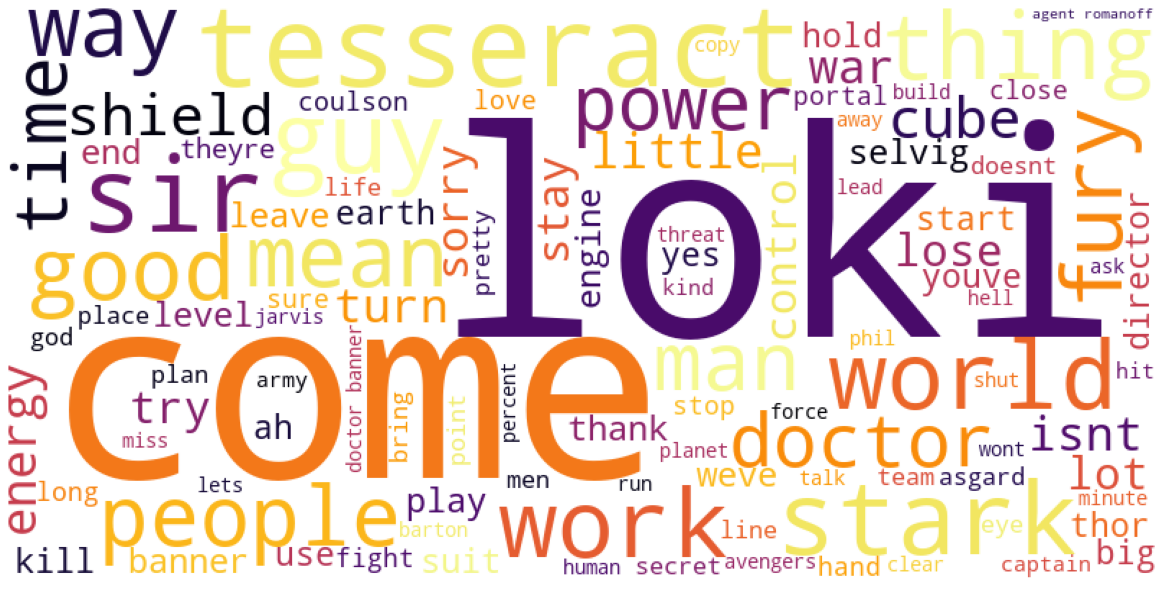

In [20]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
wordcloud = WordCloud(max_font_size=200, min_font_size=10, max_words=150, background_color="white",
                      colormap='inferno',
                     width=800, height=400, prefer_horizontal=0.99).generate(string_text)
                                                                            
# Display the generated image:
plt.figure(figsize = (16, 8))
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0) 
plt.show()

In [21]:
freq = nltk.FreqDist(filtered_words4)

freq.most_common(20)

[('come', 37),
 ('like', 37),
 ('loki', 35),
 ('tesseract', 33),
 ('stark', 32),
 ('sir', 30),
 ('work', 25),
 ('world', 24),
 ('doctor', 24),
 ('thing', 24),
 ('guy', 24),
 ('power', 21),
 ('good', 21),
 ('way', 20),
 ('agent', 19),
 ('people', 19),
 ('mean', 19),
 ('banner', 18),
 ('man', 18),
 ('time', 17)]

## Network to analysis characters' relationship


In [22]:
network = script.copy()
network

lineNum       character  \
0          1       THE OTHER   
1          2  INTERCOM VOICE   
2          3       NICK FURY   
3          4    PHIL COULSON   
4          5       NICK FURY   
..       ...             ...   
944      945      MARIA HILL   
945      946       NICK FURY   
946      947      MARIA HILL   
947      948       NICK FURY   
948      949       THE OTHER   

                                                  line  \
0    The Tesseract has awakened. It is on a little ...   
1    All personnel, evacuation order has been confi...   
2                                       How bad is it?   
3    That’s the problem, sir. We don’t know. Doctor...   
4     NASA didn’t authorize Selvig could go to test B.   
..                                                 ...   
944                            Really sure about that?   
945                                              I am.   
946                                               Why?   
947                        Because we’ll need them to.   
948  The humans, they are not the cowering wretches...   

                                            clean_line  \
0    The Tesseract has awakened It is on a little w...   
1    All personnel evacuation order has been confir...   
2                                        How bad is it   
3    Thats the problem sir We dont know Doctor Selv...   
4       NASA didnt authorize Selvig could go to test B   
..                                                 ...   
944                             Really sure about that   
945                                               I am   
946                                                Why   
947                          Because well need them to   
948  The humans they are not the cowering wretches ...   

                                            POS tagged  \
0    [(Tesseract, n), (awakened, v), (little, a), (...   
1    [(personnel, n), (evacuation, n), (order, n), ...   
2                                           [(bad, a)]   
3    [(Thats, v), (problem, n), (sir, n), (dont, v)...   
4    [(NASA, n), (didnt, n), (authorize, n), (Selvi...   
..                                                 ...   
944                           [(Really, r), (sure, a)]   
945                                                 []   
946                                                 []   
947                             [(well, r), (need, v)]   
948  [(humans, n), (cowering, n), (wretches, n), (p...   

                                                 Lemma  
0      Tesseract awaken little world human world wo...  
1      personnel evacuation order confirm Proceed d...  
2                                                  bad  
3      Thats problem sir dont know Doctor Selvig re...  
4          NASA didnt authorize Selvig could go test B  
..                                                 ...  
944                                        Really sure  
945                                                     
946                                                     
947                                          well need  
948    human cowering wretch promise stand unruly t...  

[949 rows x 6 columns]

In [23]:
# Combine character and line 
network['char_line'] = network['character'] + network['Lemma']
network

lineNum       character  \
0          1       THE OTHER   
1          2  INTERCOM VOICE   
2          3       NICK FURY   
3          4    PHIL COULSON   
4          5       NICK FURY   
..       ...             ...   
944      945      MARIA HILL   
945      946       NICK FURY   
946      947      MARIA HILL   
947      948       NICK FURY   
948      949       THE OTHER   

                                                  line  \
0    The Tesseract has awakened. It is on a little ...   
1    All personnel, evacuation order has been confi...   
2                                       How bad is it?   
3    That’s the problem, sir. We don’t know. Doctor...   
4     NASA didn’t authorize Selvig could go to test B.   
..                                                 ...   
944                            Really sure about that?   
945                                              I am.   
946                                               Why?   
947                        Because we’ll need them to.   
948  The humans, they are not the cowering wretches...   

                                            clean_line  \
0    The Tesseract has awakened It is on a little w...   
1    All personnel evacuation order has been confir...   
2                                        How bad is it   
3    Thats the problem sir We dont know Doctor Selv...   
4       NASA didnt authorize Selvig could go to test B   
..                                                 ...   
944                             Really sure about that   
945                                               I am   
946                                                Why   
947                          Because well need them to   
948  The humans they are not the cowering wretches ...   

                                            POS tagged  \
0    [(Tesseract, n), (awakened, v), (little, a), (...   
1    [(personnel, n), (evacuation, n), (order, n), ...   
2                                           [(bad, a)]   
3    [(Thats, v), (problem, n), (sir, n), (dont, v)...   
4    [(NASA, n), (didnt, n), (authorize, n), (Selvi...   
..                                                 ...   
944                           [(Really, r), (sure, a)]   
945                                                 []   
946                                                 []   
947                             [(well, r), (need, v)]   
948  [(humans, n), (cowering, n), (wretches, n), (p...   

                                                 Lemma  \
0      Tesseract awaken little world human world wo...   
1      personnel evacuation order confirm Proceed d...   
2                                                  bad   
3      Thats problem sir dont know Doctor Selvig re...   
4          NASA didnt authorize Selvig could go test B   
..                                                 ...   
944                                        Really sure   
945                                                      
946                                                      
947                                          well need   
948    human cowering wretch promise stand unruly t...   

                                             char_line  
0    THE OTHER  Tesseract awaken little world human...  
1    INTERCOM VOICE  personnel evacuation order con...  
2                                       NICK FURY  bad  
3    PHIL COULSON  Thats problem sir dont know Doct...  
4    NICK FURY  NASA didnt authorize Selvig could g...  
..                                                 ...  
944                            MARIA HILL  Really sure  
945                                         NICK FURY   
946                                        MARIA HILL   
947                               NICK FURY  well need  
948  THE OTHER  human cowering wretch promise stand...  

[949 rows x 7 columns]

In [24]:
# List of characters
network['character_word_by_word'] = network['character'].str.split(' ')
network['character_word_by_word'] = tuple(list(network['character_word_by_word']))
network

lineNum       character  \
0          1       THE OTHER   
1          2  INTERCOM VOICE   
2          3       NICK FURY   
3          4    PHIL COULSON   
4          5       NICK FURY   
..       ...             ...   
944      945      MARIA HILL   
945      946       NICK FURY   
946      947      MARIA HILL   
947      948       NICK FURY   
948      949       THE OTHER   

                                                  line  \
0    The Tesseract has awakened. It is on a little ...   
1    All personnel, evacuation order has been confi...   
2                                       How bad is it?   
3    That’s the problem, sir. We don’t know. Doctor...   
4     NASA didn’t authorize Selvig could go to test B.   
..                                                 ...   
944                            Really sure about that?   
945                                              I am.   
946                                               Why?   
947                        Because we’ll need them to.   
948  The humans, they are not the cowering wretches...   

                                            clean_line  \
0    The Tesseract has awakened It is on a little w...   
1    All personnel evacuation order has been confir...   
2                                        How bad is it   
3    Thats the problem sir We dont know Doctor Selv...   
4       NASA didnt authorize Selvig could go to test B   
..                                                 ...   
944                             Really sure about that   
945                                               I am   
946                                                Why   
947                          Because well need them to   
948  The humans they are not the cowering wretches ...   

                                            POS tagged  \
0    [(Tesseract, n), (awakened, v), (little, a), (...   
1    [(personnel, n), (evacuation, n), (order, n), ...   
2                                           [(bad, a)]   
3    [(Thats, v), (problem, n), (sir, n), (dont, v)...   
4    [(NASA, n), (didnt, n), (authorize, n), (Selvi...   
..                                                 ...   
944                           [(Really, r), (sure, a)]   
945                                                 []   
946                                                 []   
947                             [(well, r), (need, v)]   
948  [(humans, n), (cowering, n), (wretches, n), (p...   

                                                 Lemma  \
0      Tesseract awaken little world human world wo...   
1      personnel evacuation order confirm Proceed d...   
2                                                  bad   
3      Thats problem sir dont know Doctor Selvig re...   
4          NASA didnt authorize Selvig could go test B   
..                                                 ...   
944                                        Really sure   
945                                                      
946                                                      
947                                          well need   
948    human cowering wretch promise stand unruly t...   

                                             char_line character_word_by_word  
0    THE OTHER  Tesseract awaken little world human...           [THE, OTHER]  
1    INTERCOM VOICE  personnel evacuation order con...      [INTERCOM, VOICE]  
2                                       NICK FURY  bad           [NICK, FURY]  
3    PHIL COULSON  Thats problem sir dont know Doct...        [PHIL, COULSON]  
4    NICK FURY  NASA didnt authorize Selvig could g...           [NICK, FURY]  
..                                                 ...                    ...  
944                            MARIA HILL  Really sure          [MARIA, HILL]  
945                                         NICK FURY            [NICK, FURY]  
946                                        MARIA HILL           [MARIA, HILL]  
947                             

In [25]:
# Replace space with underscore for characters
network['character'] = network['character'].str.replace(" ", "_")
network

lineNum       character  \
0          1       THE_OTHER   
1          2  INTERCOM_VOICE   
2          3       NICK_FURY   
3          4    PHIL_COULSON   
4          5       NICK_FURY   
..       ...             ...   
944      945      MARIA_HILL   
945      946       NICK_FURY   
946      947      MARIA_HILL   
947      948       NICK_FURY   
948      949       THE_OTHER   

                                                  line  \
0    The Tesseract has awakened. It is on a little ...   
1    All personnel, evacuation order has been confi...   
2                                       How bad is it?   
3    That’s the problem, sir. We don’t know. Doctor...   
4     NASA didn’t authorize Selvig could go to test B.   
..                                                 ...   
944                            Really sure about that?   
945                                              I am.   
946                                               Why?   
947                        Because we’ll need them to.   
948  The humans, they are not the cowering wretches...   

                                            clean_line  \
0    The Tesseract has awakened It is on a little w...   
1    All personnel evacuation order has been confir...   
2                                        How bad is it   
3    Thats the problem sir We dont know Doctor Selv...   
4       NASA didnt authorize Selvig could go to test B   
..                                                 ...   
944                             Really sure about that   
945                                               I am   
946                                                Why   
947                          Because well need them to   
948  The humans they are not the cowering wretches ...   

                                            POS tagged  \
0    [(Tesseract, n), (awakened, v), (little, a), (...   
1    [(personnel, n), (evacuation, n), (order, n), ...   
2                                           [(bad, a)]   
3    [(Thats, v), (problem, n), (sir, n), (dont, v)...   
4    [(NASA, n), (didnt, n), (authorize, n), (Selvi...   
..                                                 ...   
944                           [(Really, r), (sure, a)]   
945                                                 []   
946                                                 []   
947                             [(well, r), (need, v)]   
948  [(humans, n), (cowering, n), (wretches, n), (p...   

                                                 Lemma  \
0      Tesseract awaken little world human world wo...   
1      personnel evacuation order confirm Proceed d...   
2                                                  bad   
3      Thats problem sir dont know Doctor Selvig re...   
4          NASA didnt authorize Selvig could go test B   
..                                                 ...   
944                                        Really sure   
945                                                      
946                                                      
947                                          well need   
948    human cowering wretch promise stand unruly t...   

                                             char_line character_word_by_word  
0    THE OTHER  Tesseract awaken little world human...           [THE, OTHER]  
1    INTERCOM VOICE  personnel evacuation order con...      [INTERCOM, VOICE]  
2                                       NICK FURY  bad           [NICK, FURY]  
3    PHIL COULSON  Thats problem sir dont know Doct...        [PHIL, COULSON]  
4    NICK FURY  NASA didnt authorize Selvig could g...           [NICK, FURY]  
..                                                 ...                    ...  
944                            MARIA HILL  Really sure          [MARIA, HILL]  
945                                         NICK FURY            [NICK, FURY]  
946                                        MARIA HILL           [MARIA, HILL]  
947                             

In [26]:
# Distinct characters
character_list = network['character'].unique()
char = character_list.tolist()
type(char)

list

In [27]:
numCharacters = len(char)
numCharacters

54

In [28]:
# Dictionary for characters
character_map = {}
for i in range(numCharacters):
    character_map[i] = char[i]

character_map

{0: 'THE_OTHER',
 1: 'INTERCOM_VOICE',
 2: 'NICK_FURY',
 3: 'PHIL_COULSON',
 4: 'MARIA_HILL',
 5: 'ERIK_SELVIG',
 6: 'CLINT_BARTON',
 7: 'NASA_SCIENTIST',
 8: 'LOKI',
 9: 'GEORGI_LUCHKOV',
 10: 'NATASHA_ROMANOFF',
 11: 'WEASELLY_THUG',
 12: 'CALCUTTA_WOMAN',
 13: 'YOUNG_GIRL',
 14: 'BRUCE_BANNER',
 15: 'COUNCILMAN',
 16: 'COUNCILWOMAN',
 17: 'STEVE_ROGERS',
 18: 'PEGGY_CARTER',
 19: 'SCIENTIST',
 20: 'TONY_STARK',
 21: 'PEPPER_POTTS',
 22: 'JARVIS',
 23: 'FACELESS_PILOT',
 24: 'HELICARRIER_INTERCOM',
 25: 'CARRIER_BRIDGE_TECH_1',
 26: 'FEMALE_CARRIER_BRIDGE_TECH',
 27: 'MALE_AGENT',
 28: 'JAPSER_SITWELL',
 29: 'GERMAN_OLD_MAN',
 30: 'THOR',
 31: 'PILOT',
 32: 'NOVAR',
 33: 'OFF_SCREEN_WORKER',
 34: 'MAINTENANCE_GUY',
 35: 'SHIELD_AGENT',
 36: 'YOUNG_SHIELD_PILOT',
 37: 'SHIELD_WORKER',
 38: 'SECURITY_GUARD',
 39: 'SHIELD_ENGINEER',
 40: 'YOUNG_COP',
 41: 'POLICE_SERGEANT',
 42: 'HULK',
 43: 'JET_PILOT',
 44: 'REPORTER',
 45: 'MALE_REPORTER',
 46: 'MALE_CITIZEN',
 47: 'FEMALE_CITIZEN',


In [29]:
# Combine char_line columns into a string
all_char_line = " ".join(char_line for char_line in network['char_line'])
# all_char_line

# # Tokenize all_char_line
# char_line_token  = word_tokenize(all_char_line)

In [30]:
token_exception = []
for i in range(len(network)):
    token_exception.append(tuple(network.loc[i, 'character_word_by_word']))

In [31]:
# Tokenize all_char_line except for characters
from nltk.tokenize import MWETokenizer
tokenizer=MWETokenizer(token_exception)

char_line_token = tokenizer.tokenize(all_char_line.split())

In [32]:
# Find occurence of each character 
k=0;
numOccurrences=pd.Series(range(numCharacters))
for character in character_list:
    numOccurrences[k] =char_line_token.count(character)
    k=k+1

In [33]:
numOccurrences

0       7
1       7
2     110
3      42
4      27
5      19
6      43
7       1
8      68
9       6
10     97
11      1
12      1
13      3
14     84
15     11
16      6
17    122
18      1
19      1
20    152
21     29
22     20
23      1
24      1
25      2
26      2
27      1
28      2
29      2
30     47
31      1
32      1
33      1
34      1
35      2
36      1
37      2
38     12
39      1
40      2
41      2
42      1
43      2
44      2
45      1
46      1
47      1
48      1
49      1
50      1
51      1
52      1
53      1
dtype: int64

Text(0, 0.5, 'Number of occurence')

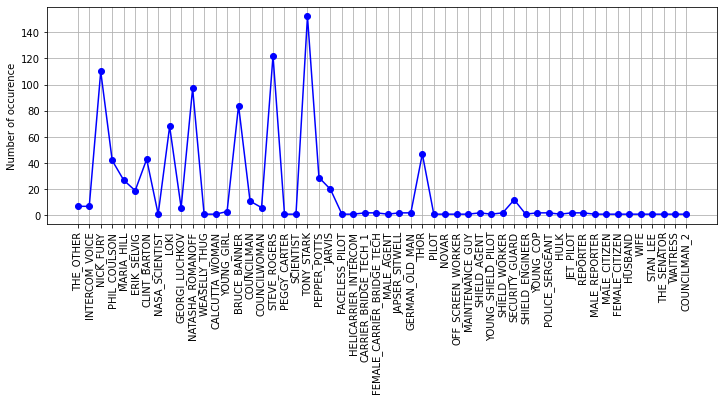

In [34]:
fig   = plt.figure(figsize = (12, 4))
plt.style.use('default')
ax    = fig.add_subplot(111)
plt.plot(numOccurrences,'b-o')
plt.xticks(np.arange(0,numCharacters),character_list)
plt.grid()
ax.tick_params(axis='x', rotation=90, labelsize=10)
plt.ylabel('Number of occurence')

In [35]:
# Create ndarray with zeros for position of each character
positions_characters = [] 
for i in range(len(numOccurrences)):
    a = np.zeros(numOccurrences[i])  
    positions_characters.append(a)     

In [36]:
numCharacters

54

In [37]:
# Iterate over every character and find the position 
for j in range(numCharacters):
    positions_current=[]
    for i in range(len(char_line_token)):
        if char_line_token[i]==character_list[j]:
#             print(i)
            positions_current.append(i)
#     print(positions_current)
    positions_characters[j][:]=positions_current   

In [38]:
#positions_characters[1]

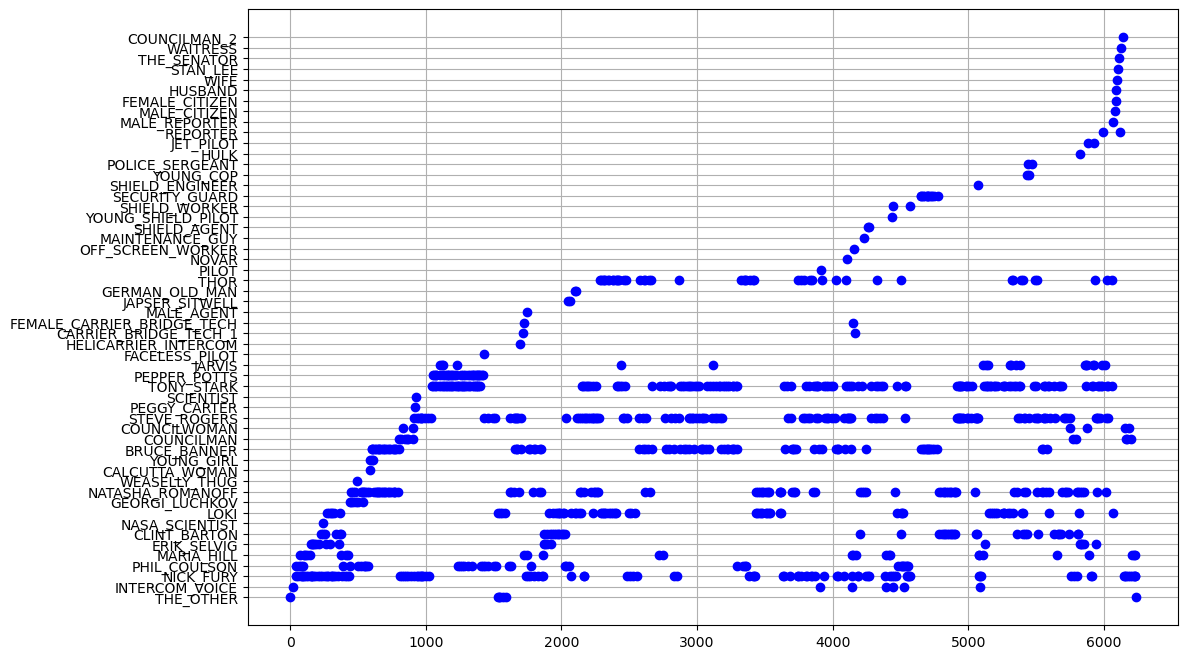

In [39]:
fig   = plt.figure(figsize = (12, 8))
ax    = fig.add_subplot(111)
for j in range(0,numCharacters):
    plt.plot( positions_characters[j],j*np.ones(numOccurrences[j]),'bo')
    
plt.yticks(np.arange(0,numCharacters),character_list)
plt.grid()

In [40]:
# Find the distance between characters
interactions_characters = np.zeros((numCharacters,numCharacters))
for i in range(numCharacters-1):
    for j in range(i+1,numCharacters):
        # A pair of characters (i,j) has been selected, 
        # now iterate over their locations and find the distances
        #print(i,j)
        for loc_i in range(numOccurrences[i]):
            for loc_j in range(numOccurrences[j]):
                # find distance
                dist = abs(positions_characters[i][loc_i]-positions_characters[j][loc_j])
                #if distance is small, then record interaction
                if (dist<200):
                    interactions_characters[i,j]=interactions_characters[i,j]+1
                    interactions_characters[j,i]=interactions_characters[j,i]+1
                #print(i,j, positions_characters[i][loc_i],positions_characters[j][loc_j])
                #print(i,j, loc_i,loc_j,dist)
        
#positions_characters
#interactions_characters

In [41]:
interactions_characters.shape

(54, 54)

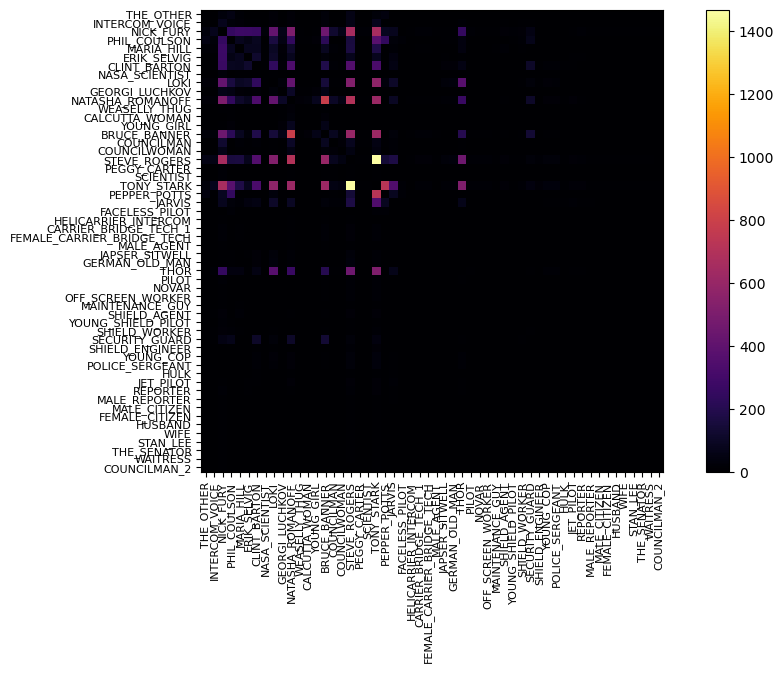

In [42]:
import matplotlib
fig2 = plt.figure(figsize = (11, 6)) 
ax2    = fig2.add_subplot(111)
plt.imshow(interactions_characters,cmap=matplotlib.cm.inferno) 
plt.colorbar()
plt.yticks(np.arange(0,numCharacters),character_list)
plt.xticks(np.arange(0,numCharacters),character_list)
ax2.tick_params(axis='x', rotation=90, labelsize=8)
ax2.tick_params(axis='y', labelsize=8)

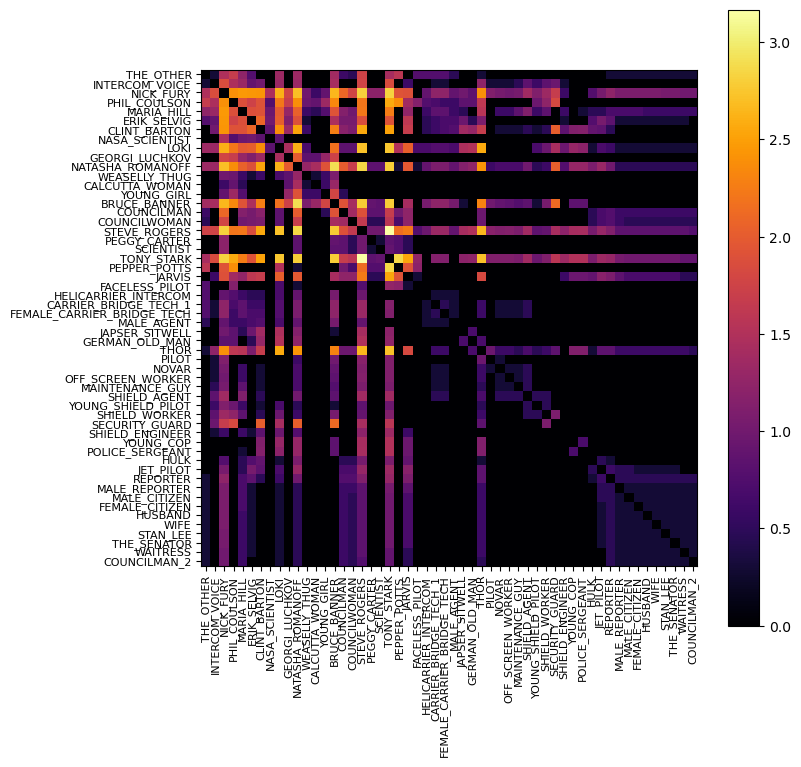

In [43]:
#Take log of the graph
fig3 = plt.figure(figsize = (8, 8)) 
ax3    = fig3.add_subplot(111)
plt.imshow(np.log10(1+interactions_characters),cmap=matplotlib.cm.inferno)
plt.colorbar()
plt.yticks(np.arange(0,numCharacters),character_list)
plt.xticks(np.arange(0,numCharacters),character_list)
ax3.tick_params(axis='x', rotation=90, labelsize=8)
ax3.tick_params(axis='y', labelsize=8)

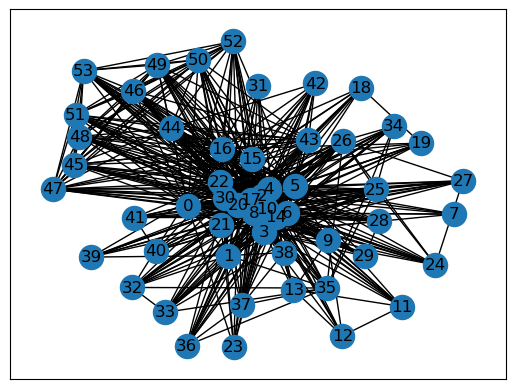

In [44]:
import networkx as nx
G1=nx.from_numpy_matrix(interactions_characters)
nx.draw_networkx(G1)

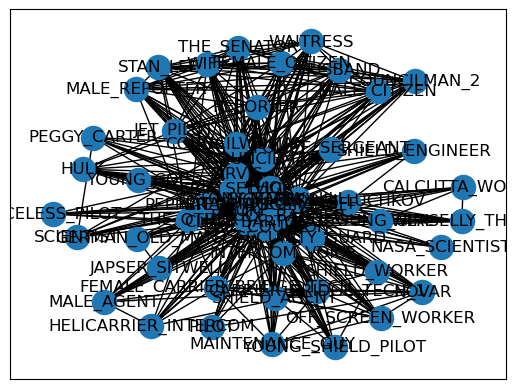

In [45]:
H1 = nx.relabel_nodes(G1, character_map)
nx.draw_networkx(H1)

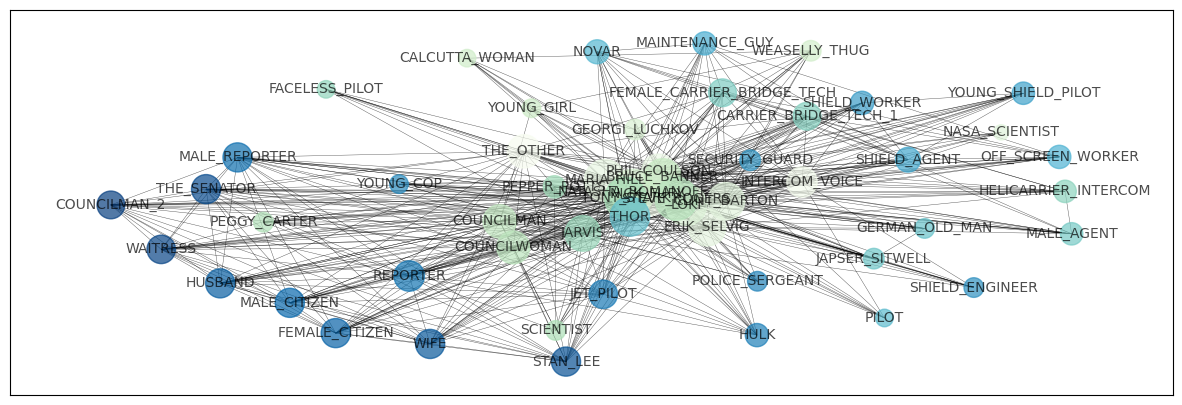

In [46]:
# Change size of node according to degree (number of neighbours)
kdeg  = G1.degree()
fig   = plt.figure(figsize = (15, 5))
ax1   = plt.subplot(111)
H1    = nx.relabel_nodes(G1, character_map)
nx.draw_networkx(H1, node_color=range(numCharacters),font_color='black',width=0.3,alpha=0.7, 
                 font_size=10, cmap=matplotlib.cm.GnBu
                 ,node_size =[20*val for (node,val) in kdeg])

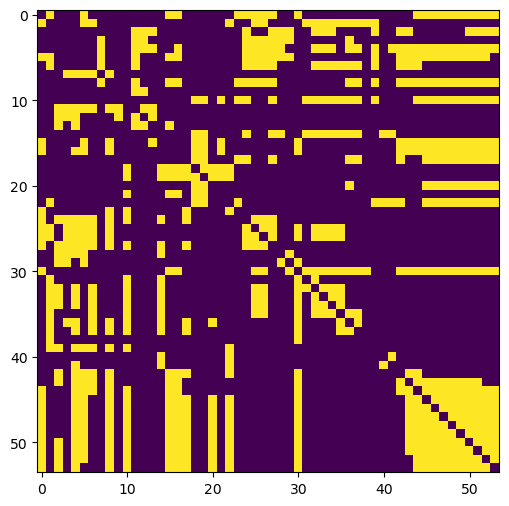

In [47]:
# Adjacency matrix withfcases less than a certain number of occurences
plt.figure(figsize = (11, 6)) 
plt.imshow((interactions_characters<=10)&(interactions_characters>0)) 

In [48]:
# Delete interactions with less than 30 occurences
interactions_characters[interactions_characters<=30]=0
G2=nx.from_numpy_matrix(interactions_characters)

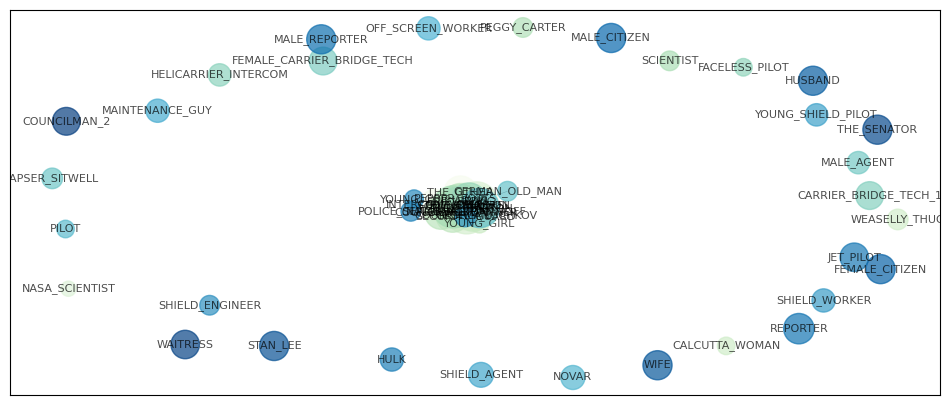

In [49]:
fig   = plt.figure(figsize = (12, 5))
ax1   = plt.subplot(111)
H2    = nx.relabel_nodes(nx.from_numpy_matrix(np.log10(1+interactions_characters)), character_map)
nx.draw_networkx(H2, node_color=range(numCharacters),font_color='black',width=0.3,alpha=0.7, font_size=8, cmap=matplotlib.cm.GnBu,node_size =[20*val for (node,val) in kdeg])


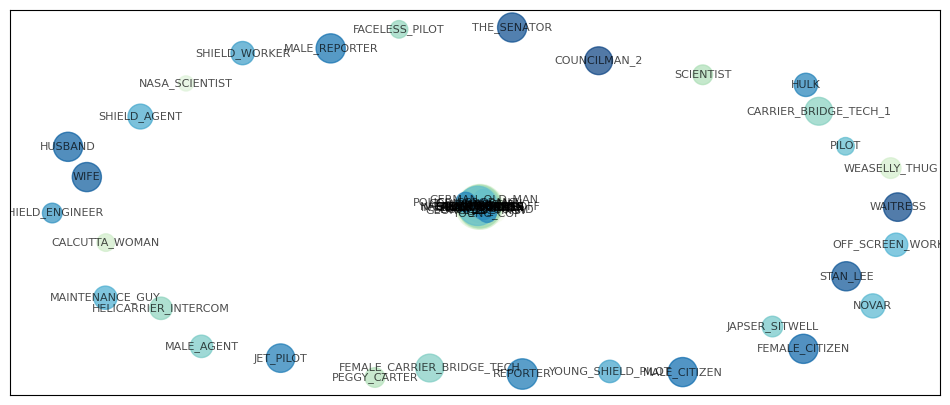

In [50]:
fig   = plt.figure(figsize = (12, 5))
ax1   = plt.subplot(111)
H2    = nx.relabel_nodes(nx.from_numpy_matrix(interactions_characters), character_map)
nx.draw_networkx(H2, node_color=range(numCharacters),font_color='black',width=0.3,alpha=0.7, 
                 font_size=8, cmap=matplotlib.cm.GnBu,node_size =[20*val for (node,val) in kdeg])

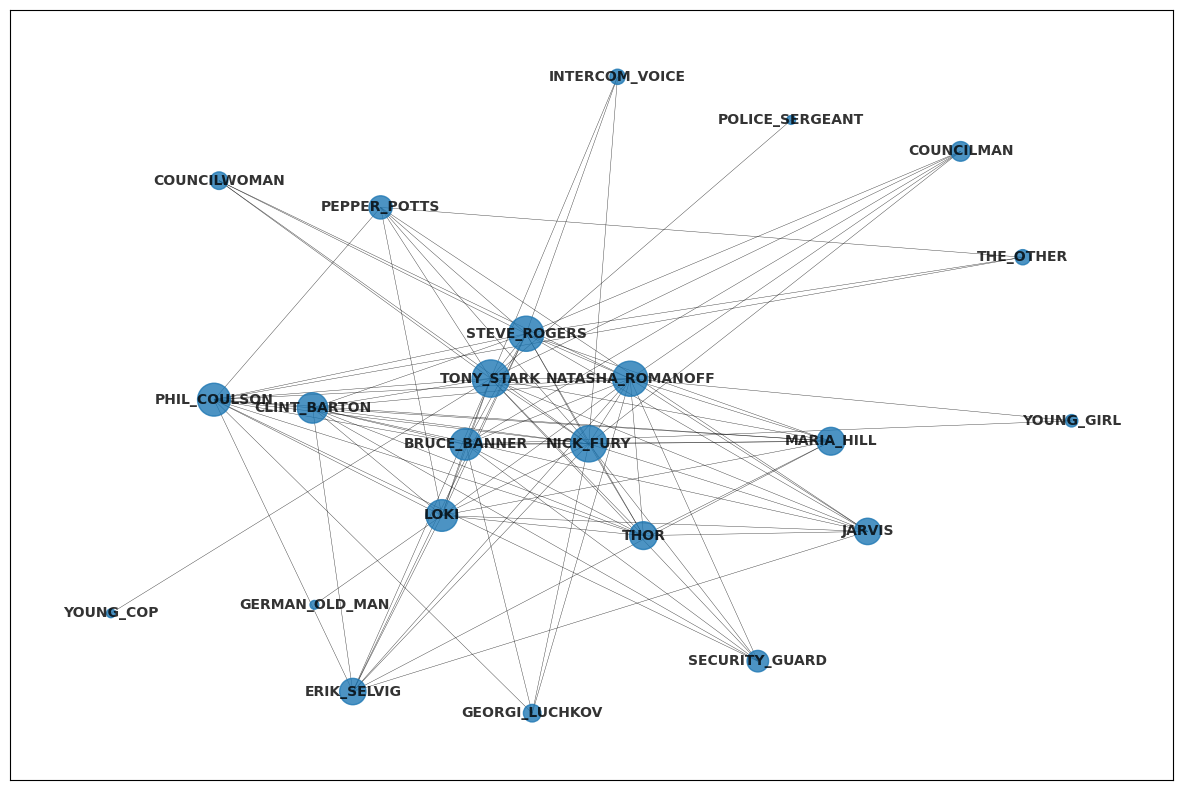

In [51]:
# Only show the largest subset
largestSubgraph = max(nx.connected_components(G2), key = len)
largest_component = G2.subgraph(largestSubgraph)
H3 = nx.relabel_nodes(largest_component, character_map)

pos = nx.spring_layout(H3, k=10)

fig = plt.figure(figsize=(15, 10))
largest_kdeg  = H3.degree()
d = dict(largest_kdeg)

nx.draw_networkx(H3, pos=pos, font_color='black',width=0.3,alpha=0.8, font_weight='bold',
                 font_size=10, cmap=matplotlib.cm.GnBu, node_size =[40*val for (node,val) in largest_kdeg])

In [52]:
type(largest_component)

networkx.classes.graph.Graph

In [53]:
degree_centrality = nx.degree_centrality(H1)
nx.set_node_attributes(H1,degree_centrality,'dc')
centralityValues=[v for v in degree_centrality.values()]

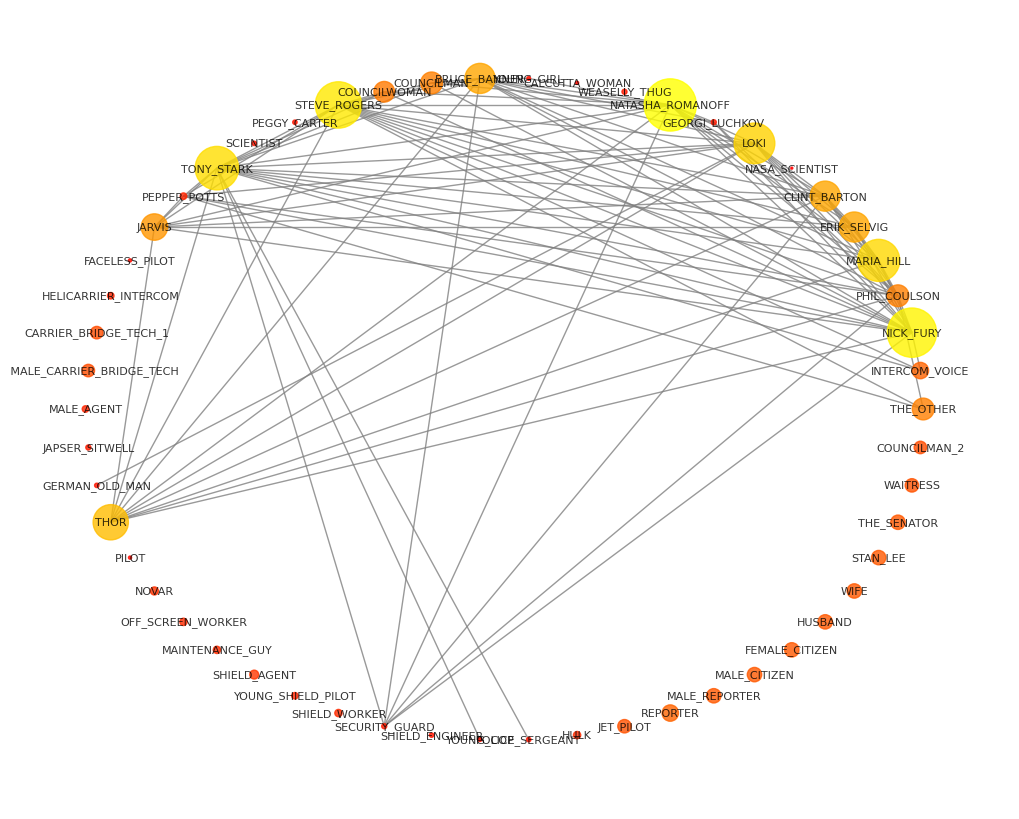

In [54]:
fig   = plt.figure(figsize = (10, 8))
nx.draw_circular(H2, node_color=centralityValues,font_color='black',alpha=0.8,edge_color='gray',
#                  edge_weight=5,
                 font_size=8,with_labels=True, cmap=matplotlib.cm.autumn,
                 node_size=[1500*(v**3) for v in degree_centrality.values()])

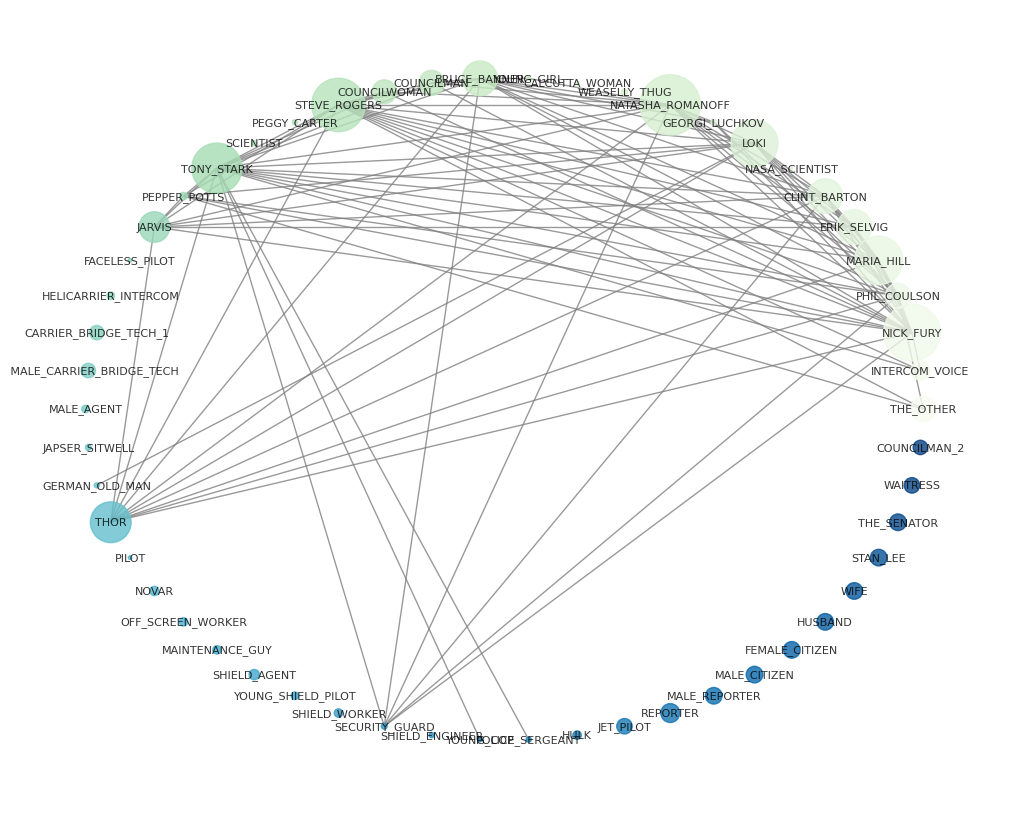

In [55]:
fig   = plt.figure(figsize = (10, 8))
nx.draw_circular(H2, node_color=range(numCharacters),font_color='black',alpha=0.8,edge_color='gray',
#                  edge_weight=5,
                 font_size=8,with_labels=True, cmap=matplotlib.cm.GnBu,
                 node_size=[2000*(v**3) for v in degree_centrality.values()])


In [56]:
cliques = list(nx.find_cliques(H3))
cl2 = list(cliques)
len(cl2)

16

In [57]:
# fig   = plt.figure(figsize = (15, 15))
# ax1  = fig.add_subplot(221)
# nx.draw_networkx(H2.subgraph(cl2[0]),font_size=8,font_color='black',node_color='green',edge_color='gray')
# plt.axis('off')
# ax2  = fig.add_subplot(222)
# nx.draw_networkx(H2.subgraph(cl2[10]),font_size=8,font_color='black',node_color='cyan',edge_color='gray')
# plt.axis('off')
# ax3  = fig.add_subplot(223)
# nx.draw_networkx(H2.subgraph(cl2[15]),font_size=8,font_color='black',node_color='yellow',edge_color='gray')
# plt.axis('off')
# ax4  = fig.add_subplot(224)
# nx.draw_networkx(H2.subgraph(cl2[28]),font_size=8,font_color='black',node_color='#ff00ff',edge_color='gray')
# plt.axis('off')

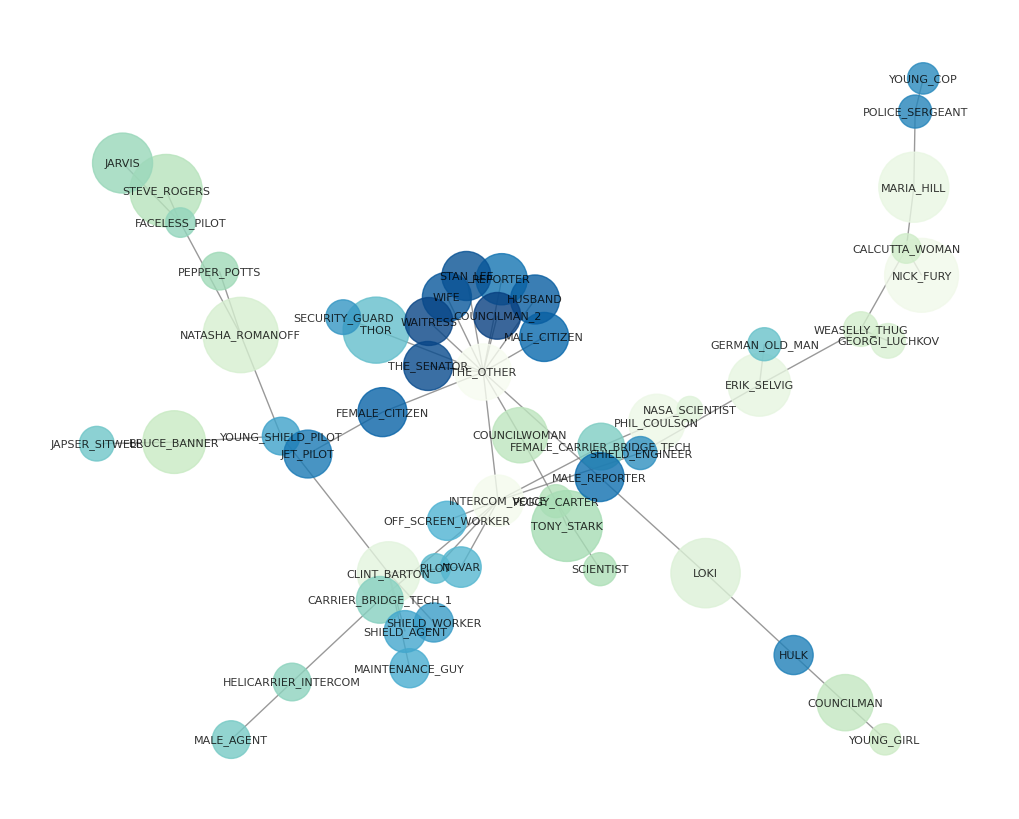

In [58]:
T = nx.minimum_spanning_tree(H1)
fig   = plt.figure(figsize = (10, 8))
nx.draw_spring(T, node_color=range(numCharacters),font_color='black',alpha=0.8,edge_color='gray',
                 font_size=8,with_labels=True, cmap=matplotlib.cm.GnBu,
                 node_size=[3000*v for v in degree_centrality.values()])


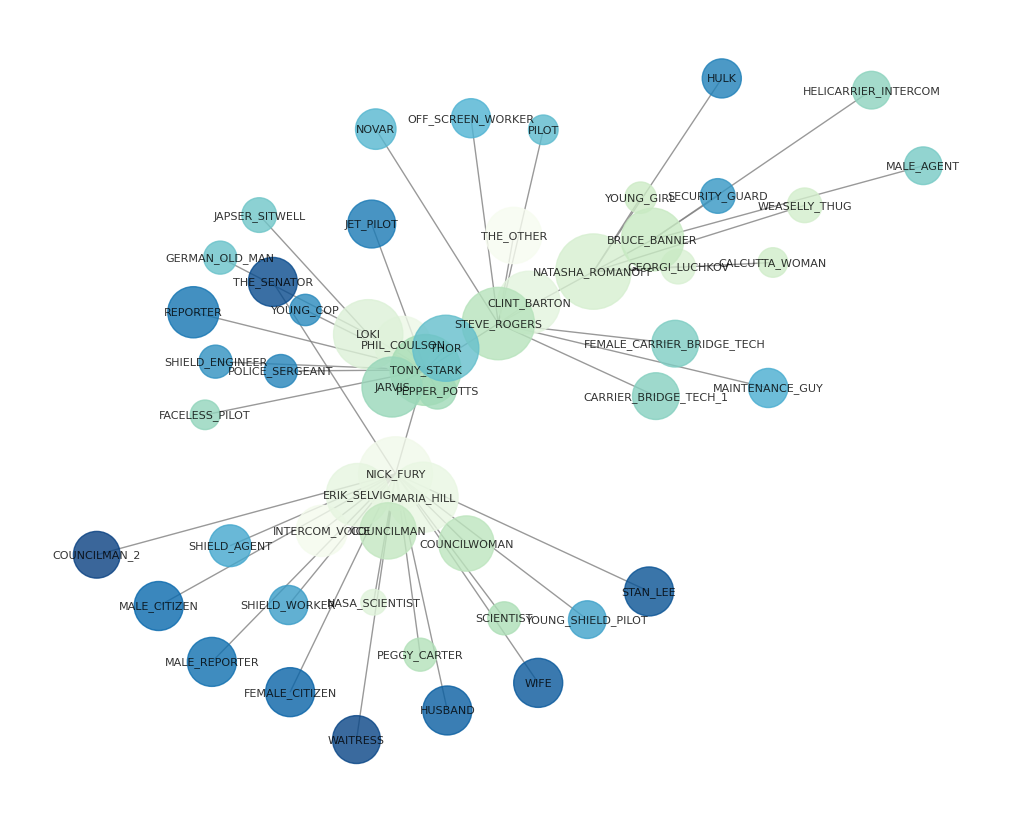

In [59]:
T = nx.maximum_spanning_tree(H1)
fig   = plt.figure(figsize = (10, 8))
nx.draw_spring(T, node_color=range(numCharacters),font_color='black',alpha=0.8,edge_color='gray',
                 font_size=8,with_labels=True, cmap=matplotlib.cm.GnBu,
                 node_size=[3000*v for v in degree_centrality.values()])

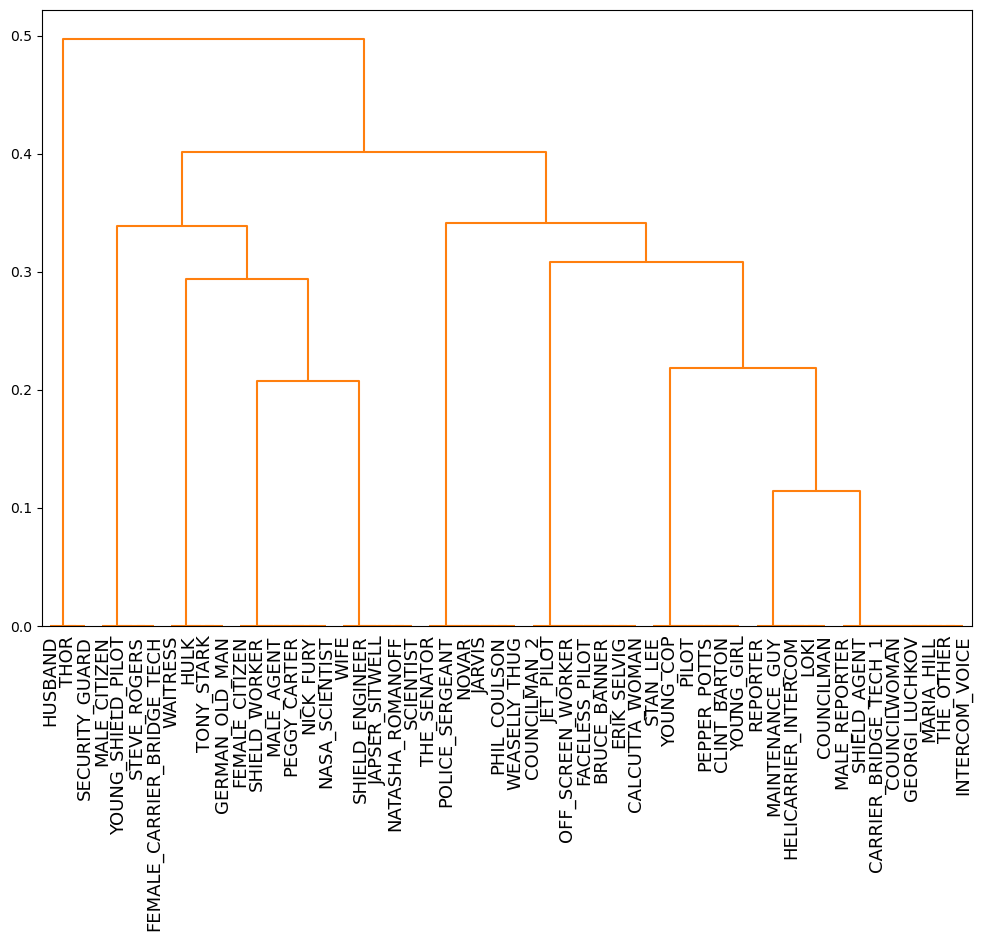

In [60]:
from scipy.spatial import distance
from scipy.cluster import hierarchy

sd    = distance.squareform(np.log(1+interactions_characters))
h     = hierarchy.average(sd)
fig   = plt.figure(figsize = (12, 8))
ax    = fig.add_subplot(111)

h2    = hierarchy.dendrogram(h,labels=character_list,color_threshold=1.1)
ax.tick_params(axis='x', rotation=90, labelsize=13)

# Sentiment analysis

## VADER

In [61]:
vader = script.copy()
vader

lineNum       character  \
0          1       THE OTHER   
1          2  INTERCOM VOICE   
2          3       NICK FURY   
3          4    PHIL COULSON   
4          5       NICK FURY   
..       ...             ...   
944      945      MARIA HILL   
945      946       NICK FURY   
946      947      MARIA HILL   
947      948       NICK FURY   
948      949       THE OTHER   

                                                  line  \
0    The Tesseract has awakened. It is on a little ...   
1    All personnel, evacuation order has been confi...   
2                                       How bad is it?   
3    That’s the problem, sir. We don’t know. Doctor...   
4     NASA didn’t authorize Selvig could go to test B.   
..                                                 ...   
944                            Really sure about that?   
945                                              I am.   
946                                               Why?   
947                        Because we’ll need them to.   
948  The humans, they are not the cowering wretches...   

                                            clean_line  \
0    The Tesseract has awakened It is on a little w...   
1    All personnel evacuation order has been confir...   
2                                        How bad is it   
3    Thats the problem sir We dont know Doctor Selv...   
4       NASA didnt authorize Selvig could go to test B   
..                                                 ...   
944                             Really sure about that   
945                                               I am   
946                                                Why   
947                          Because well need them to   
948  The humans they are not the cowering wretches ...   

                                            POS tagged  \
0    [(Tesseract, n), (awakened, v), (little, a), (...   
1    [(personnel, n), (evacuation, n), (order, n), ...   
2                                           [(bad, a)]   
3    [(Thats, v), (problem, n), (sir, n), (dont, v)...   
4    [(NASA, n), (didnt, n), (authorize, n), (Selvi...   
..                                                 ...   
944                           [(Really, r), (sure, a)]   
945                                                 []   
946                                                 []   
947                             [(well, r), (need, v)]   
948  [(humans, n), (cowering, n), (wretches, n), (p...   

                                                 Lemma  
0      Tesseract awaken little world human world wo...  
1      personnel evacuation order confirm Proceed d...  
2                                                  bad  
3      Thats problem sir dont know Doctor Selvig re...  
4          NASA didnt authorize Selvig could go test B  
..                                                 ...  
944                                        Really sure  
945                                                     
946                                                     
947                                          well need  
948    human cowering wretch promise stand unruly t...  

[949 rows x 6 columns]

In [62]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

analyzer = SentimentIntensityAnalyzer()

# function to calculate vader sentiment
def vadersentimentanalysis(review):
    vs = analyzer.polarity_scores(review)
    return vs['compound']

vader['VaderSentiment'] = vader['Lemma'].apply(vadersentimentanalysis)
    
# function to analyse
def vader_analysis(compound):
    if compound >= 0.5:
        return 'Positive'
    elif compound <= -0.5 :
        return 'Negative'
    else:
        return 'Neutral'

vader['Vader Analysis'] = vader['VaderSentiment'].apply(vader_analysis)
vader.head()

lineNum       character                                               line  \
0        1       THE OTHER  The Tesseract has awakened. It is on a little ...   
1        2  INTERCOM VOICE  All personnel, evacuation order has been confi...   
2        3       NICK FURY                                     How bad is it?   
3        4    PHIL COULSON  That’s the problem, sir. We don’t know. Doctor...   
4        5       NICK FURY   NASA didn’t authorize Selvig could go to test B.   

                                          clean_line  \
0  The Tesseract has awakened It is on a little w...   
1  All personnel evacuation order has been confir...   
2                                      How bad is it   
3  Thats the problem sir We dont know Doctor Selv...   
4     NASA didnt authorize Selvig could go to test B   

                                          POS tagged  \
0  [(Tesseract, n), (awakened, v), (little, a), (...   
1  [(personnel, n), (evacuation, n), (order, n), ...   
2                                         [(bad, a)]   
3  [(Thats, v), (problem, n), (sir, n), (dont, v)...   
4  [(NASA, n), (didnt, n), (authorize, n), (Selvi...   

                                               Lemma  VaderSentiment  \
0    Tesseract awaken little world human world wo...         -0.2755   
1    personnel evacuation order confirm Proceed d...         -0.3818   
2                                                bad         -0.5423   
3    Thats problem sir dont know Doctor Selvig re...         -0.1531   
4        NASA didnt authorize Selvig could go test B          0.0000   

  Vader Analysis  
0        Neutral  
1        Neutral  
2       Negative  
3        Neutral  
4        Neutral

In [63]:
# Rolling average for smoothing 
vader['smooVader'] = vader['VaderSentiment'].rolling(5, min_periods=1).mean()
vader.head()

lineNum       character                                               line  \
0        1       THE OTHER  The Tesseract has awakened. It is on a little ...   
1        2  INTERCOM VOICE  All personnel, evacuation order has been confi...   
2        3       NICK FURY                                     How bad is it?   
3        4    PHIL COULSON  That’s the problem, sir. We don’t know. Doctor...   
4        5       NICK FURY   NASA didn’t authorize Selvig could go to test B.   

                                          clean_line  \
0  The Tesseract has awakened It is on a little w...   
1  All personnel evacuation order has been confir...   
2                                      How bad is it   
3  Thats the problem sir We dont know Doctor Selv...   
4     NASA didnt authorize Selvig could go to test B   

                                          POS tagged  \
0  [(Tesseract, n), (awakened, v), (little, a), (...   
1  [(personnel, n), (evacuation, n), (order, n), ...   
2                                         [(bad, a)]   
3  [(Thats, v), (problem, n), (sir, n), (dont, v)...   
4  [(NASA, n), (didnt, n), (authorize, n), (Selvi...   

                                               Lemma  VaderSentiment  \
0    Tesseract awaken little world human world wo...         -0.2755   
1    personnel evacuation order confirm Proceed d...         -0.3818   
2                                                bad         -0.5423   
3    Thats problem sir dont know Doctor Selvig re...         -0.1531   
4        NASA didnt authorize Selvig could go test B          0.0000   

  Vader Analysis  smooVader  
0        Neutral  -0.275500  
1        Neutral  -0.328650  
2       Negative  -0.399867  
3        Neutral  -0.338175  
4        Neutral  -0.270540

In [64]:
# Noise removal
# https://machinelearning1.wordpress.com/2014/07/13/signal-processing-apply-median-filters-python/
import scipy.signal as sp
def apply_filter(df):
    print('Before applying noise-filter \n', df.describe())    
#     n = 20 # larger n, smoother curve
#     b = [1.0/n]*n
#     a = 1
    df['noise_removed'] = sp.medfilt(df['smooVader'], 15)    
    print('After applying noise-filter \n', df.describe())
    return df
vader = apply_filter(vader)

Before applying noise-filter 
           lineNum  VaderSentiment   smooVader
count  949.000000      949.000000  949.000000
mean   475.000000        0.032335    0.031750
std    274.097002        0.333258    0.153688
min      1.000000       -0.983400   -0.479780
25%    238.000000        0.000000   -0.073000
50%    475.000000        0.000000    0.035300
75%    712.000000        0.273200    0.131000
max    949.000000        0.974400    0.583760
After applying noise-filter 
           lineNum  VaderSentiment   smooVader  noise_removed
count  949.000000      949.000000  949.000000     949.000000
mean   475.000000        0.032335    0.031750       0.027030
std    274.097002        0.333258    0.153688       0.085592
min      1.000000       -0.983400   -0.479780      -0.224880
25%    238.000000        0.000000   -0.073000      -0.030800
50%    475.000000        0.000000    0.035300       0.018400
75%    712.000000        0.273200    0.131000       0.083240
max    949.000000        0.974400    

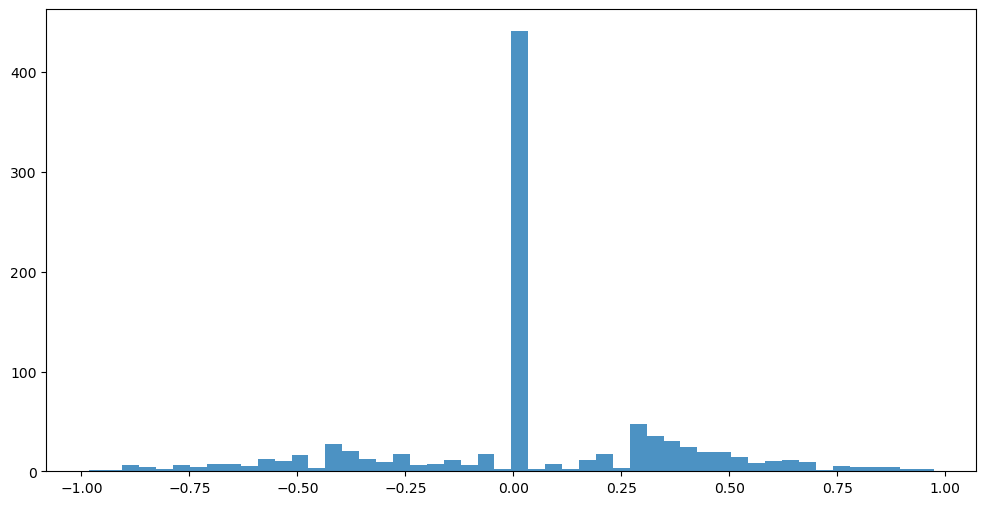

In [65]:
# Plot histogram
import matplotlib as mpl
mpl.style.use('default')
plt.figure(figsize=(12, 6))
plt.hist(vader['VaderSentiment'], bins=50, alpha=0.8)
plt.show()

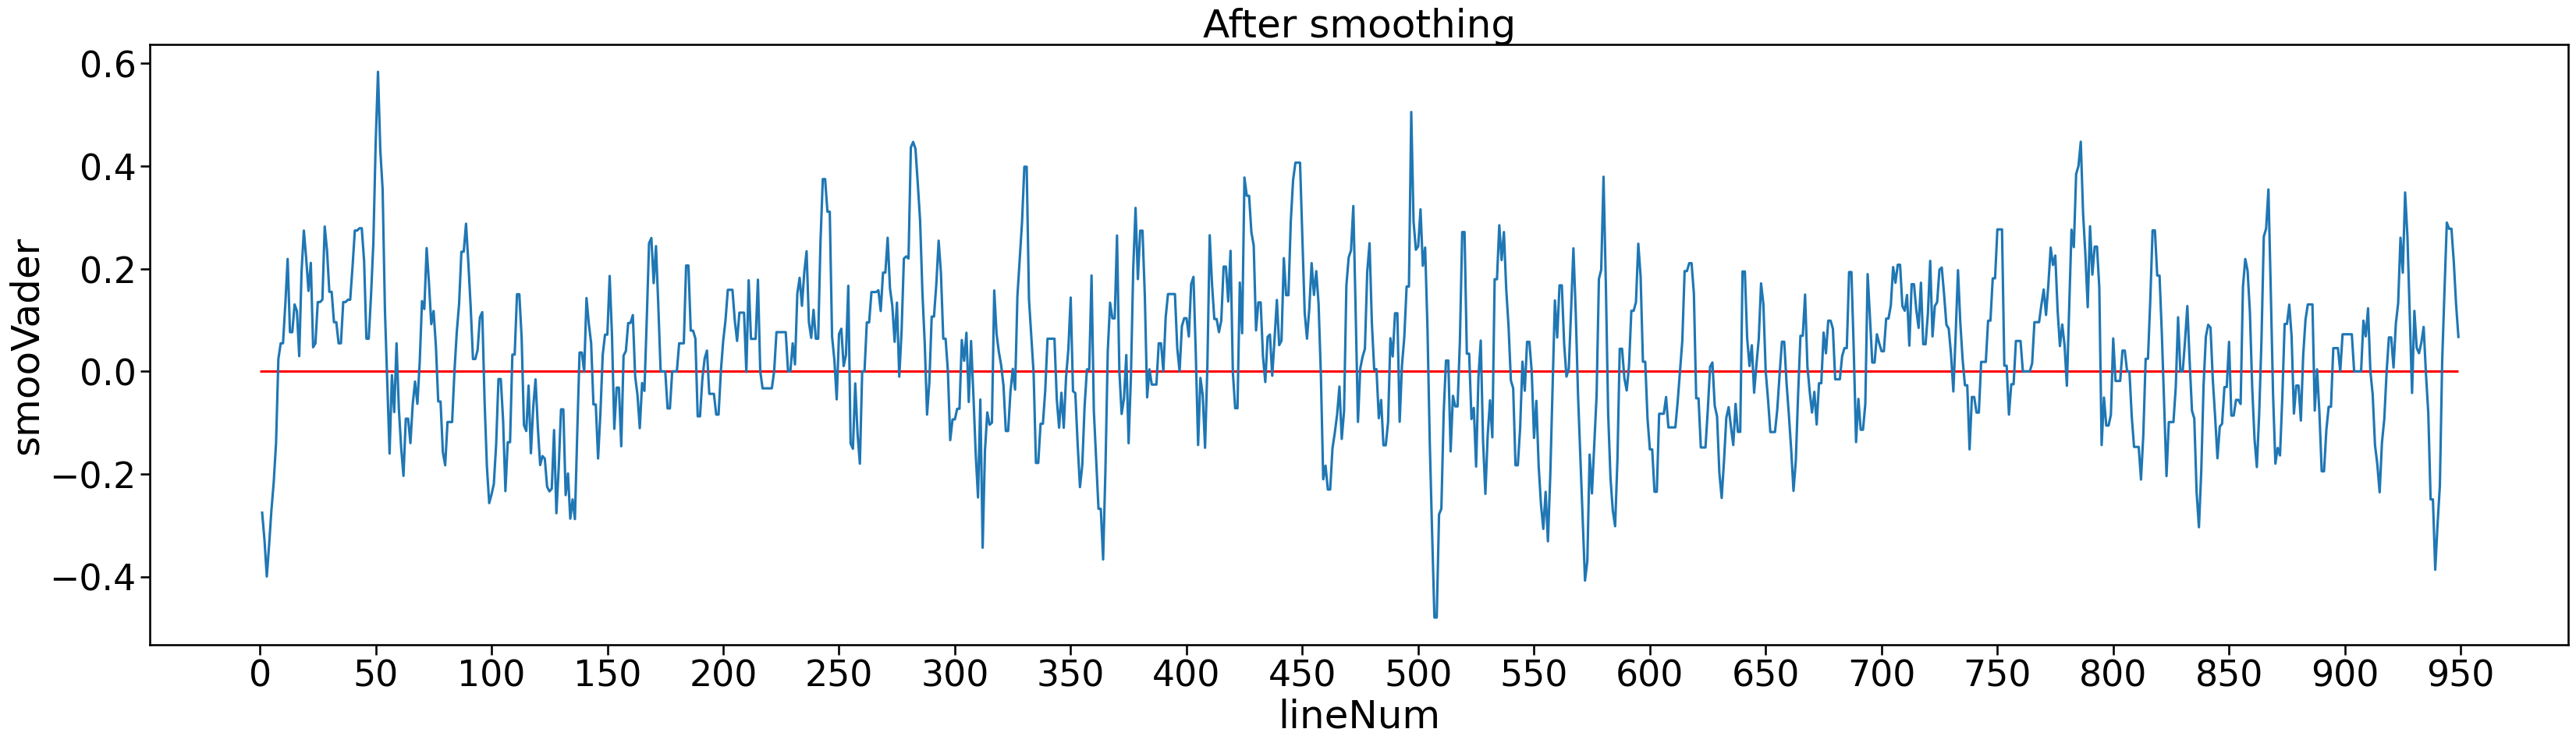

In [66]:
# plt.plot(fin_df['lineNum'], fin_df['VadarSentiment'])

import seaborn as sns

plt.figure(figsize=(40, 10))
sns.set_context("talk", font_scale=2)
sns.lineplot(x='lineNum', y='smooVader', data=vader)
plt.title('After smoothing')
plt.xticks(np.arange(0, 1000, 50))
plt.hlines(0, 0, vader.lineNum.max(), color='red')
plt.show()

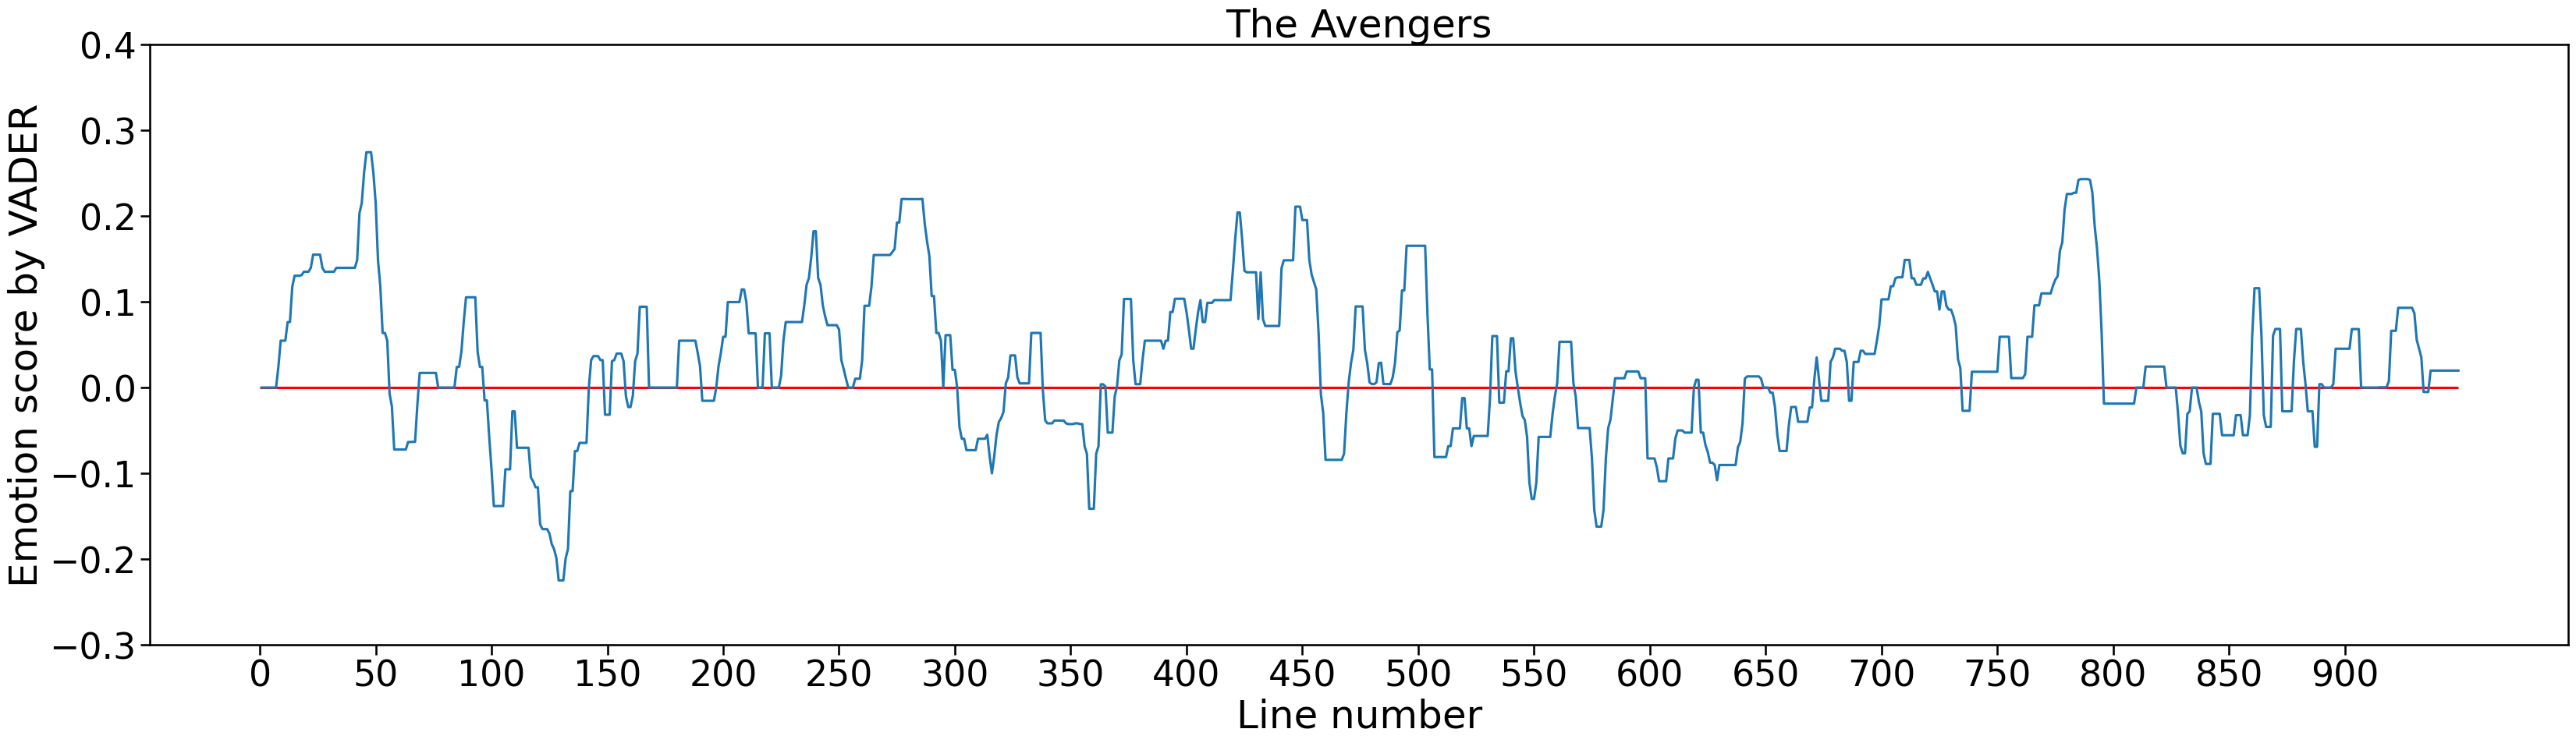

In [67]:
plt.figure(figsize=(40, 10))
sns.set_context("talk", font_scale=2)
sns.lineplot(x='lineNum', y='noise_removed', data=vader)
plt.title('The Avengers')
plt.xlabel('Line number')
plt.ylabel('Emotion score by VADER')
plt.ylim([-0.3, 0.4])
plt.xticks(np.arange(0, vader.lineNum.max(), 50))
plt.hlines(0, 0, vader.lineNum.max(), color='red')
plt.show()

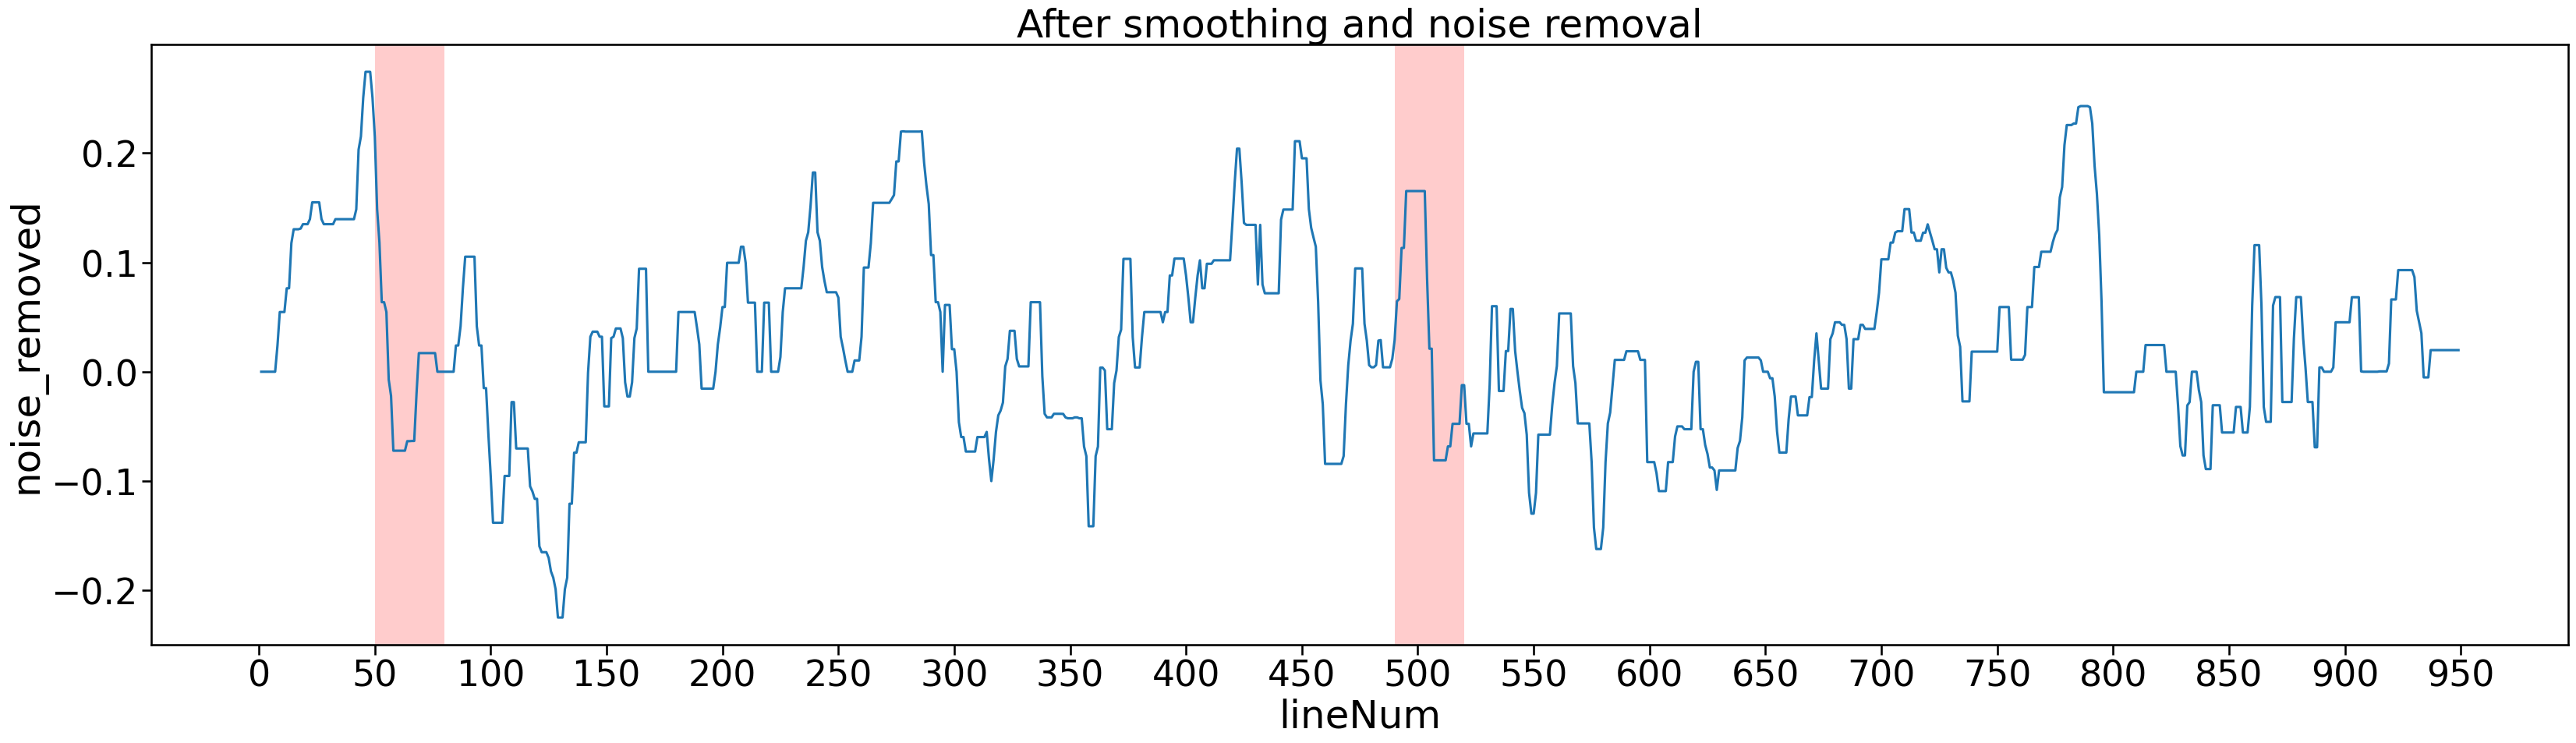

In [68]:
# Plot 
plt.figure(figsize=(40, 10))
sns.set_context("talk", font_scale=2)
plot = sns.lineplot(x='lineNum', y='noise_removed', data=vader)
plt.title('After smoothing and noise removal')
plt.xticks(np.arange(0, 1000, 50))

plot.axvspan(490, 520, facecolor='red', alpha=.2)
plot.axvspan(50, 80, facecolor='red', alpha=.2)
plt.show()

## Test Blob

In [69]:
blob = script.copy()
blob

lineNum       character  \
0          1       THE OTHER   
1          2  INTERCOM VOICE   
2          3       NICK FURY   
3          4    PHIL COULSON   
4          5       NICK FURY   
..       ...             ...   
944      945      MARIA HILL   
945      946       NICK FURY   
946      947      MARIA HILL   
947      948       NICK FURY   
948      949       THE OTHER   

                                                  line  \
0    The Tesseract has awakened. It is on a little ...   
1    All personnel, evacuation order has been confi...   
2                                       How bad is it?   
3    That’s the problem, sir. We don’t know. Doctor...   
4     NASA didn’t authorize Selvig could go to test B.   
..                                                 ...   
944                            Really sure about that?   
945                                              I am.   
946                                               Why?   
947                        Because we’ll need them to.   
948  The humans, they are not the cowering wretches...   

                                            clean_line  \
0    The Tesseract has awakened It is on a little w...   
1    All personnel evacuation order has been confir...   
2                                        How bad is it   
3    Thats the problem sir We dont know Doctor Selv...   
4       NASA didnt authorize Selvig could go to test B   
..                                                 ...   
944                             Really sure about that   
945                                               I am   
946                                                Why   
947                          Because well need them to   
948  The humans they are not the cowering wretches ...   

                                            POS tagged  \
0    [(Tesseract, n), (awakened, v), (little, a), (...   
1    [(personnel, n), (evacuation, n), (order, n), ...   
2                                           [(bad, a)]   
3    [(Thats, v), (problem, n), (sir, n), (dont, v)...   
4    [(NASA, n), (didnt, n), (authorize, n), (Selvi...   
..                                                 ...   
944                           [(Really, r), (sure, a)]   
945                                                 []   
946                                                 []   
947                             [(well, r), (need, v)]   
948  [(humans, n), (cowering, n), (wretches, n), (p...   

                                                 Lemma  
0      Tesseract awaken little world human world wo...  
1      personnel evacuation order confirm Proceed d...  
2                                                  bad  
3      Thats problem sir dont know Doctor Selvig re...  
4          NASA didnt authorize Selvig could go test B  
..                                                 ...  
944                                        Really sure  
945                                                     
946                                                     
947                                          well need  
948    human cowering wretch promise stand unruly t...  

[949 rows x 6 columns]

In [70]:
# TestBlob
from textblob import TextBlob

# function to calculate subjectivity
def getSubjectivity(review):
    return TextBlob(review).sentiment.subjectivity

# function to calculate polarity
def getPolarity(review):
    return TextBlob(review).sentiment.polarity

# function to analyze the reviews
def analysis(score):
    if score < 0:
        return 'Negative'
    elif score == 0:
        return 'Neutral'
    else:
        return 'Positive'

blob['Subjectivity'] = blob['Lemma'].apply(getSubjectivity) 
blob['Polarity'] = blob['Lemma'].apply(getPolarity) 
blob['Analysis'] = blob['Polarity'].apply(analysis)
blob.head()

lineNum       character                                               line  \
0        1       THE OTHER  The Tesseract has awakened. It is on a little ...   
1        2  INTERCOM VOICE  All personnel, evacuation order has been confi...   
2        3       NICK FURY                                     How bad is it?   
3        4    PHIL COULSON  That’s the problem, sir. We don’t know. Doctor...   
4        5       NICK FURY   NASA didn’t authorize Selvig could go to test B.   

                                          clean_line  \
0  The Tesseract has awakened It is on a little w...   
1  All personnel evacuation order has been confir...   
2                                      How bad is it   
3  Thats the problem sir We dont know Doctor Selv...   
4     NASA didnt authorize Selvig could go to test B   

                                          POS tagged  \
0  [(Tesseract, n), (awakened, v), (little, a), (...   
1  [(personnel, n), (evacuation, n), (order, n), ...   
2                                         [(bad, a)]   
3  [(Thats, v), (problem, n), (sir, n), (dont, v)...   
4  [(NASA, n), (didnt, n), (authorize, n), (Selvi...   

                                               Lemma  Subjectivity  Polarity  \
0    Tesseract awaken little world human world wo...      0.300000 -0.071875   
1    personnel evacuation order confirm Proceed d...      0.000000  0.000000   
2                                                bad      0.666667 -0.700000   
3    Thats problem sir dont know Doctor Selvig re...      0.000000  0.000000   
4        NASA didnt authorize Selvig could go test B      0.000000  0.000000   

   Analysis  
0  Negative  
1   Neutral  
2  Negative  
3   Neutral  
4   Neutral

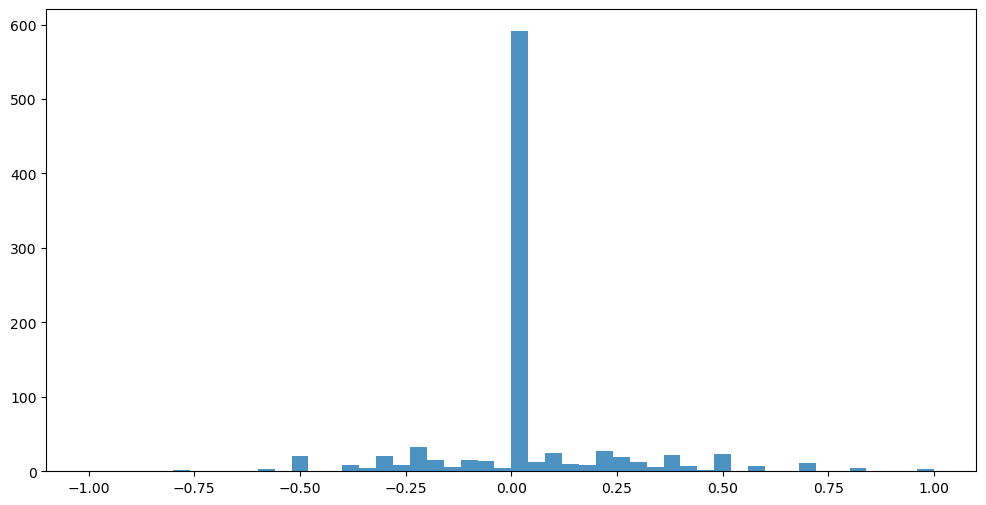

In [71]:
# Plot histogram
plt.style.use('default')
plt.figure(figsize=(12, 6))
plt.hist(blob['Polarity'], bins=50, alpha=0.8)
plt.show()

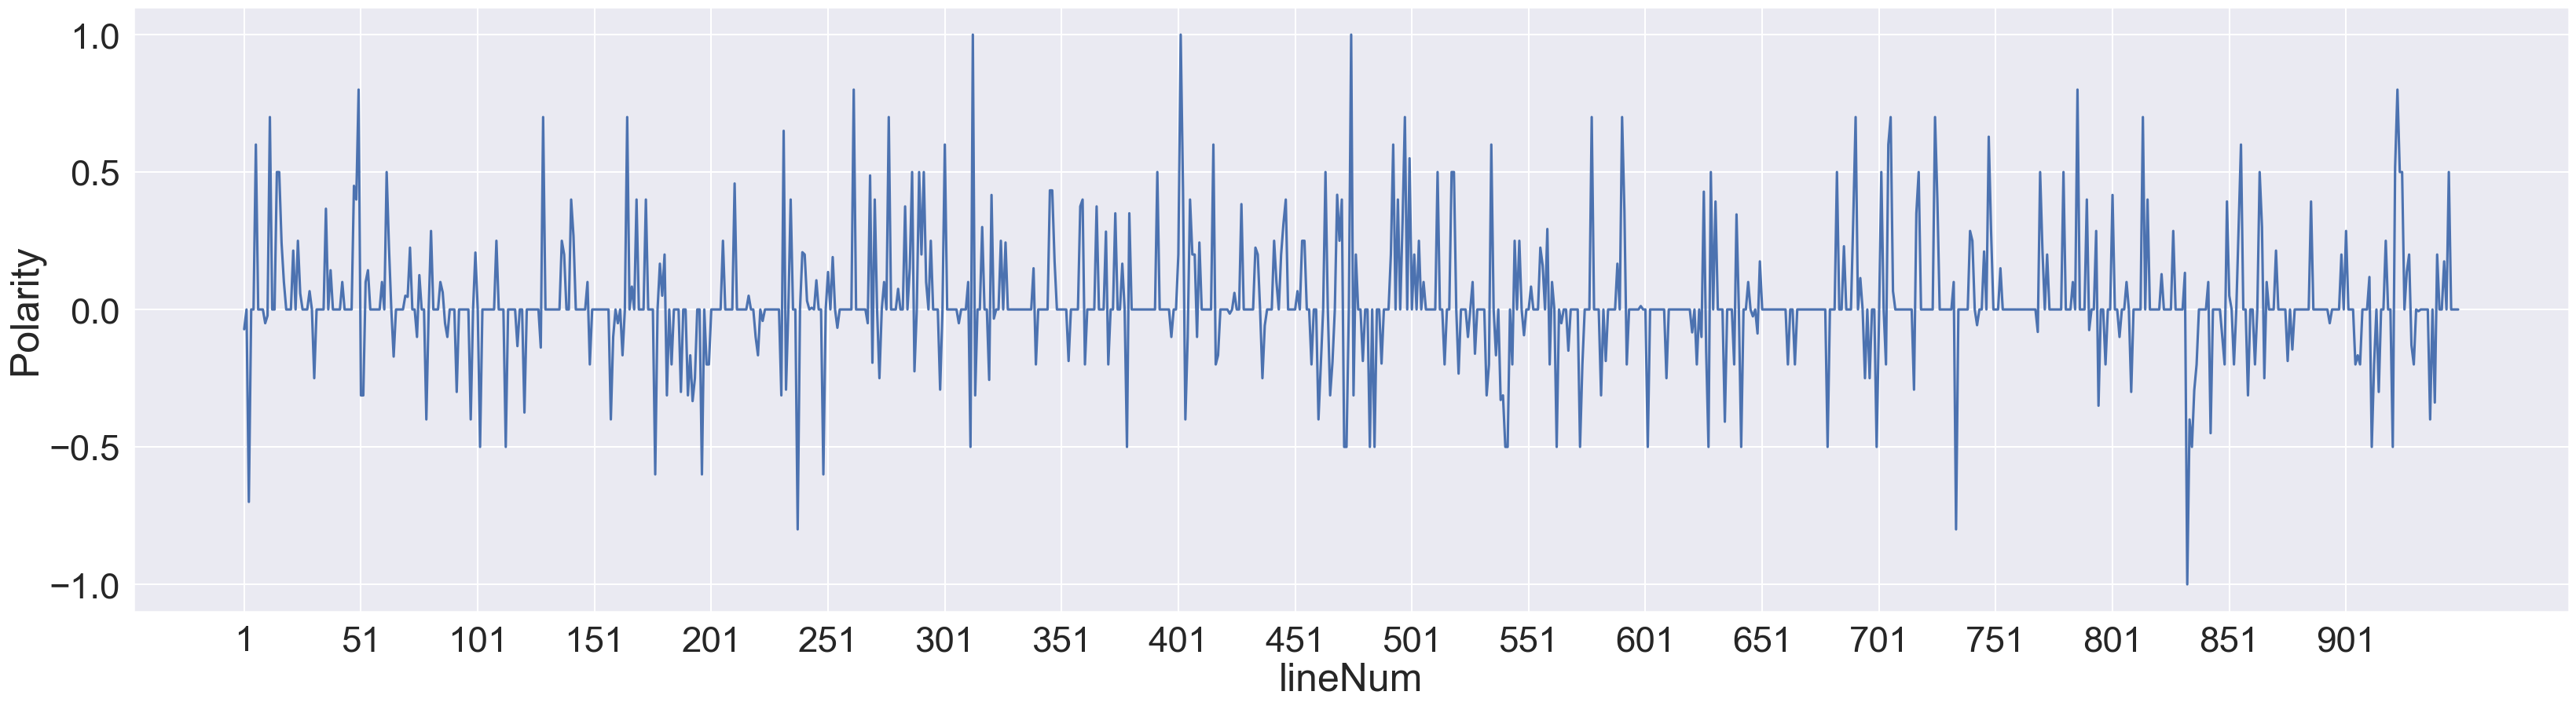

In [72]:
plt.figure(figsize=(40, 10))
sns.set()
sns.set_context("talk", font_scale=2)
sns.lineplot(x='lineNum', y='Polarity', data=blob)
plt.xticks(np.arange(blob.lineNum.min(), blob.lineNum.max(), 50))
plt.show()

In [73]:
# Rolling average for smoothing
blob['smooPolarity'] = blob['Polarity'].rolling(5, min_periods=1).mean()
blob['smooSubjectivity'] = blob['Subjectivity'].rolling(5, min_periods=1).mean()
blob.head()

lineNum       character                                               line  \
0        1       THE OTHER  The Tesseract has awakened. It is on a little ...   
1        2  INTERCOM VOICE  All personnel, evacuation order has been confi...   
2        3       NICK FURY                                     How bad is it?   
3        4    PHIL COULSON  That’s the problem, sir. We don’t know. Doctor...   
4        5       NICK FURY   NASA didn’t authorize Selvig could go to test B.   

                                          clean_line  \
0  The Tesseract has awakened It is on a little w...   
1  All personnel evacuation order has been confir...   
2                                      How bad is it   
3  Thats the problem sir We dont know Doctor Selv...   
4     NASA didnt authorize Selvig could go to test B   

                                          POS tagged  \
0  [(Tesseract, n), (awakened, v), (little, a), (...   
1  [(personnel, n), (evacuation, n), (order, n), ...   
2                                         [(bad, a)]   
3  [(Thats, v), (problem, n), (sir, n), (dont, v)...   
4  [(NASA, n), (didnt, n), (authorize, n), (Selvi...   

                                               Lemma  Subjectivity  Polarity  \
0    Tesseract awaken little world human world wo...      0.300000 -0.071875   
1    personnel evacuation order confirm Proceed d...      0.000000  0.000000   
2                                                bad      0.666667 -0.700000   
3    Thats problem sir dont know Doctor Selvig re...      0.000000  0.000000   
4        NASA didnt authorize Selvig could go test B      0.000000  0.000000   

   Analysis  smooPolarity  smooSubjectivity  
0  Negative     -0.071875          0.300000  
1   Neutral     -0.035937          0.150000  
2  Negative     -0.257292          0.322222  
3   Neutral     -0.192969          0.241667  
4   Neutral     -0.154375          0.193333

In [74]:
# Noise removal
# https://machinelearning1.wordpress.com/2014/07/13/signal-processing-apply-median-filters-python/
import scipy.signal as sp
def apply_filter(df):
    print('Before applying noise-filter \n', df.describe())    
#     n = 20 # larger n, smoother curve
#     b = [1.0/n]*n
#     a = 1
    df['noise_removed'] = sp.medfilt(df['smooPolarity'], 15)    
    print('After applying noise-filter \n', df.describe())
    return df
blob = apply_filter(blob)

Before applying noise-filter 
           lineNum  Subjectivity    Polarity  smooPolarity  smooSubjectivity
count  949.000000    949.000000  949.000000    949.000000        949.000000
mean   475.000000      0.230409    0.026362      0.026129          0.230859
std    274.097002      0.315867    0.218240      0.105144          0.146494
min      1.000000      0.000000   -1.000000     -0.478750          0.000000
25%    238.000000      0.000000    0.000000     -0.037500          0.120000
50%    475.000000      0.000000    0.000000      0.013333          0.210000
75%    712.000000      0.500000    0.000000      0.090000          0.320000
max    949.000000      1.000000    1.000000      0.463333          0.803333
After applying noise-filter 
           lineNum  Subjectivity    Polarity  smooPolarity  smooSubjectivity  \
count  949.000000    949.000000  949.000000    949.000000        949.000000   
mean   475.000000      0.230409    0.026362      0.026129          0.230859   
std    274.097002 

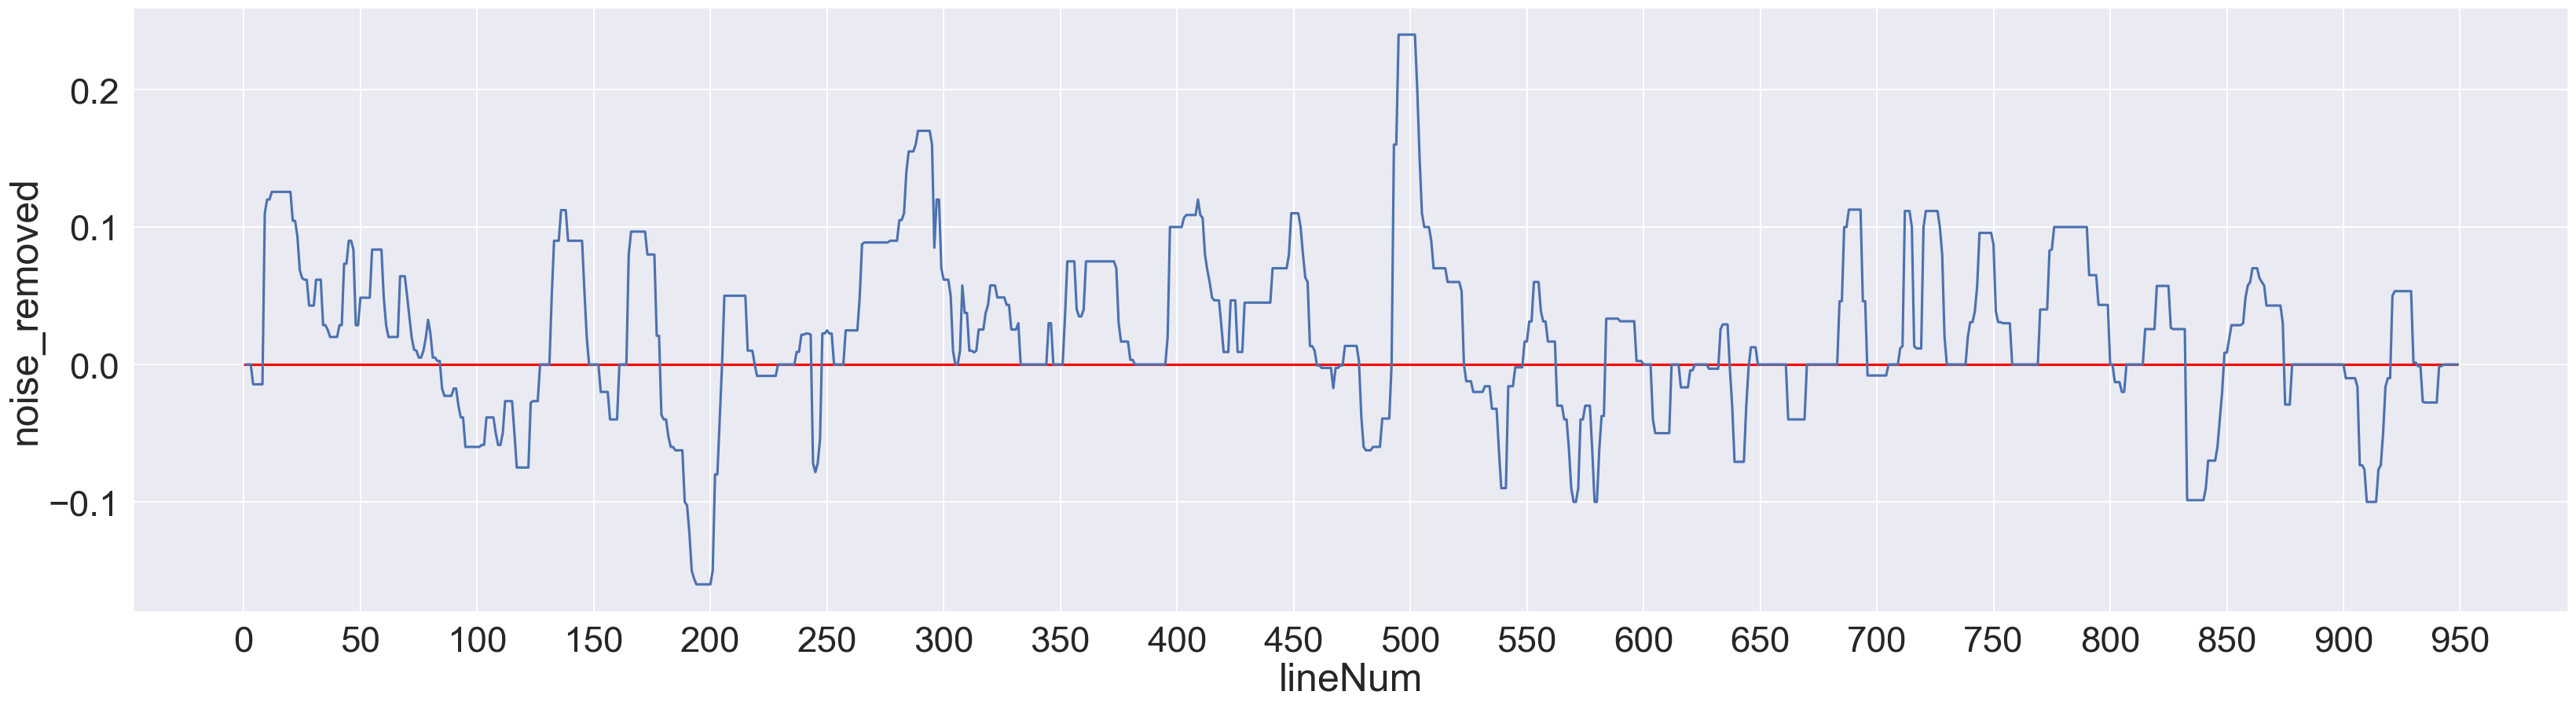

In [75]:
plt.figure(figsize=(40, 10))
sns.set_context("talk", font_scale=2)
sns.lineplot(x='lineNum', y='noise_removed', data=blob)
plt.hlines(0, 0, blob.lineNum.max(), color='red')
plt.xticks(np.arange(0, 1000, 50))
plt.show()

# NRCLex


## Line by line

In [76]:
from nrclex import NRCLex

In [77]:
nrc = script.copy()
nrc.head()

lineNum       character                                               line  \
0        1       THE OTHER  The Tesseract has awakened. It is on a little ...   
1        2  INTERCOM VOICE  All personnel, evacuation order has been confi...   
2        3       NICK FURY                                     How bad is it?   
3        4    PHIL COULSON  That’s the problem, sir. We don’t know. Doctor...   
4        5       NICK FURY   NASA didn’t authorize Selvig could go to test B.   

                                          clean_line  \
0  The Tesseract has awakened It is on a little w...   
1  All personnel evacuation order has been confir...   
2                                      How bad is it   
3  Thats the problem sir We dont know Doctor Selv...   
4     NASA didnt authorize Selvig could go to test B   

                                          POS tagged  \
0  [(Tesseract, n), (awakened, v), (little, a), (...   
1  [(personnel, n), (evacuation, n), (order, n), ...   
2                                         [(bad, a)]   
3  [(Thats, v), (problem, n), (sir, n), (dont, v)...   
4  [(NASA, n), (didnt, n), (authorize, n), (Selvi...   

                                               Lemma  
0    Tesseract awaken little world human world wo...  
1    personnel evacuation order confirm Proceed d...  
2                                                bad  
3    Thats problem sir dont know Doctor Selvig re...  
4        NASA didnt authorize Selvig could go test B

In [78]:
# Change the line to text_object for NRCLex
def totextobject(line):
    text_object = NRCLex(line)
    return text_object
nrc['text_object'] = nrc['Lemma'].apply(totextobject)
nrc.head(5)

lineNum       character                                               line  \
0        1       THE OTHER  The Tesseract has awakened. It is on a little ...   
1        2  INTERCOM VOICE  All personnel, evacuation order has been confi...   
2        3       NICK FURY                                     How bad is it?   
3        4    PHIL COULSON  That’s the problem, sir. We don’t know. Doctor...   
4        5       NICK FURY   NASA didn’t authorize Selvig could go to test B.   

                                          clean_line  \
0  The Tesseract has awakened It is on a little w...   
1  All personnel evacuation order has been confir...   
2                                      How bad is it   
3  Thats the problem sir We dont know Doctor Selv...   
4     NASA didnt authorize Selvig could go to test B   

                                          POS tagged  \
0  [(Tesseract, n), (awakened, v), (little, a), (...   
1  [(personnel, n), (evacuation, n), (order, n), ...   
2                                         [(bad, a)]   
3  [(Thats, v), (problem, n), (sir, n), (dont, v)...   
4  [(NASA, n), (didnt, n), (authorize, n), (Selvi...   

                                               Lemma  \
0    Tesseract awaken little world human world wo...   
1    personnel evacuation order confirm Proceed d...   
2                                                bad   
3    Thats problem sir dont know Doctor Selvig re...   
4        NASA didnt authorize Selvig could go test B   

                                text_object  
0  <nrclex.NRCLex object at 0x7f88e6a129a0>  
1  <nrclex.NRCLex object at 0x7f88e6a12a60>  
2  <nrclex.NRCLex object at 0x7f88e6a127f0>  
3  <nrclex.NRCLex object at 0x7f88e6a12850>  
4  <nrclex.NRCLex object at 0x7f88e6a128b0>

In [79]:
# NRCLex analysis for each line
for i, row in nrc.iterrows():
    freq = nrc.loc[i, 'text_object'].affect_frequencies
    for key in freq.keys():
        nrc.at[i, key] = freq[key]
        
nrc.head()

lineNum       character                                               line  \
0        1       THE OTHER  The Tesseract has awakened. It is on a little ...   
1        2  INTERCOM VOICE  All personnel, evacuation order has been confi...   
2        3       NICK FURY                                     How bad is it?   
3        4    PHIL COULSON  That’s the problem, sir. We don’t know. Doctor...   
4        5       NICK FURY   NASA didn’t authorize Selvig could go to test B.   

                                          clean_line  \
0  The Tesseract has awakened It is on a little w...   
1  All personnel evacuation order has been confir...   
2                                      How bad is it   
3  Thats the problem sir We dont know Doctor Selv...   
4     NASA didnt authorize Selvig could go to test B   

                                          POS tagged  \
0  [(Tesseract, n), (awakened, v), (little, a), (...   
1  [(personnel, n), (evacuation, n), (order, n), ...   
2                                         [(bad, a)]   
3  [(Thats, v), (problem, n), (sir, n), (dont, v)...   
4  [(NASA, n), (didnt, n), (authorize, n), (Selvi...   

                                               Lemma  \
0    Tesseract awaken little world human world wo...   
1    personnel evacuation order confirm Proceed d...   
2                                                bad   
3    Thats problem sir dont know Doctor Selvig re...   
4        NASA didnt authorize Selvig could go test B   

                                text_object      fear  anger  anticip  \
0  <nrclex.NRCLex object at 0x7f88e6a129a0>  0.125000  0.125      0.0   
1  <nrclex.NRCLex object at 0x7f88e6a12a60>  0.000000  0.000      0.0   
2  <nrclex.NRCLex object at 0x7f88e6a127f0>  0.200000  0.200      0.0   
3  <nrclex.NRCLex object at 0x7f88e6a12850>  0.166667  0.000      0.0   
4  <nrclex.NRCLex object at 0x7f88e6a128b0>  0.000000  0.000      0.0   

      trust  surprise  positive  negative   sadness  disgust  joy  \
0  0.125000  0.000000  0.375000  0.125000  0.000000      0.0  0.0   
1  0.000000  0.000000  0.000000  1.000000  0.000000      0.0  0.0   
2  0.000000  0.000000  0.000000  0.200000  0.200000      0.2  0.0   
3  0.166667  0.166667  0.166667  0.166667  0.166667      0.0  0.0   
4  1.000000  0.000000  0.000000  0.000000  0.000000      0.0  0.0   

   anticipation  
0         0.125  
1           NaN  
2           NaN  
3           NaN  
4           NaN

In [80]:
nrc = nrc.drop('anticip', axis=1)

In [81]:
def smoothing(column):
    smoothed = column.rolling(5, min_periods=1).mean()
    return smoothed

nrc['smooFear'] = smoothing(nrc['fear'])
nrc['smooAnger'] = smoothing(nrc['anger'])
nrc['smooTrust'] = smoothing(nrc['trust'])
nrc['smooSurprise'] = smoothing(nrc['surprise'])
nrc['smooPositive'] = smoothing(nrc['positive'])
nrc['smooNegative'] = smoothing(nrc['negative'])
nrc['smooSadness'] = smoothing(nrc['sadness'])
nrc['smooDisgust'] = smoothing(nrc['disgust'])
nrc['smooJoy'] = smoothing(nrc['joy'])
nrc['smooAnticipation'] = smoothing(nrc['anticipation'])

nrc.head()

lineNum       character                                               line  \
0        1       THE OTHER  The Tesseract has awakened. It is on a little ...   
1        2  INTERCOM VOICE  All personnel, evacuation order has been confi...   
2        3       NICK FURY                                     How bad is it?   
3        4    PHIL COULSON  That’s the problem, sir. We don’t know. Doctor...   
4        5       NICK FURY   NASA didn’t authorize Selvig could go to test B.   

                                          clean_line  \
0  The Tesseract has awakened It is on a little w...   
1  All personnel evacuation order has been confir...   
2                                      How bad is it   
3  Thats the problem sir We dont know Doctor Selv...   
4     NASA didnt authorize Selvig could go to test B   

                                          POS tagged  \
0  [(Tesseract, n), (awakened, v), (little, a), (...   
1  [(personnel, n), (evacuation, n), (order, n), ...   
2                                         [(bad, a)]   
3  [(Thats, v), (problem, n), (sir, n), (dont, v)...   
4  [(NASA, n), (didnt, n), (authorize, n), (Selvi...   

                                               Lemma  \
0    Tesseract awaken little world human world wo...   
1    personnel evacuation order confirm Proceed d...   
2                                                bad   
3    Thats problem sir dont know Doctor Selvig re...   
4        NASA didnt authorize Selvig could go test B   

                                text_object      fear  anger     trust  ...  \
0  <nrclex.NRCLex object at 0x7f88e6a129a0>  0.125000  0.125  0.125000  ...   
1  <nrclex.NRCLex object at 0x7f88e6a12a60>  0.000000  0.000  0.000000  ...   
2  <nrclex.NRCLex object at 0x7f88e6a127f0>  0.200000  0.200  0.000000  ...   
3  <nrclex.NRCLex object at 0x7f88e6a12850>  0.166667  0.000  0.166667  ...   
4  <nrclex.NRCLex object at 0x7f88e6a128b0>  0.000000  0.000  1.000000  ...   

   smooFear  smooAnger  smooTrust  smooSurprise  smooPositive  smooNegative  \
0  0.125000   0.125000   0.125000      0.000000      0.375000      0.125000   
1  0.062500   0.062500   0.062500      0.000000      0.187500      0.562500   
2  0.108333   0.108333   0.041667      0.000000      0.125000      0.441667   
3  0.122917   0.081250   0.072917      0.041667      0.135417      0.372917   
4  0.098333   0.065000   0.258333      0.033333      0.108333      0.298333   

   smooSadness  smooDisgust  smooJoy  smooAnticipation  
0     0.000000     0.000000      0.0             0.125  
1     0.000000     0.000000      0.0             0.125  
2     0.066667     0.066667      0.0             0.125  
3     0.091667     0.050000      0.0             0.125  
4     0.073333     0.040000      0.0             0.125  

[5 rows x 27 columns]

In [82]:
# Noise filter
def apply_filter(column):   
    return sp.medfilt(column, 15)


for i in range(17,27):
    col_name = str(nrc.columns[i][4:])
    nrc.loc[:, col_name] = apply_filter(nrc.iloc[:,i])

nrc = nrc.fillna(0)
nrc.head()

lineNum       character                                               line  \
0        1       THE OTHER  The Tesseract has awakened. It is on a little ...   
1        2  INTERCOM VOICE  All personnel, evacuation order has been confi...   
2        3       NICK FURY                                     How bad is it?   
3        4    PHIL COULSON  That’s the problem, sir. We don’t know. Doctor...   
4        5       NICK FURY   NASA didn’t authorize Selvig could go to test B.   

                                          clean_line  \
0  The Tesseract has awakened It is on a little w...   
1  All personnel evacuation order has been confir...   
2                                      How bad is it   
3  Thats the problem sir We dont know Doctor Selv...   
4     NASA didnt authorize Selvig could go to test B   

                                          POS tagged  \
0  [(Tesseract, n), (awakened, v), (little, a), (...   
1  [(personnel, n), (evacuation, n), (order, n), ...   
2                                         [(bad, a)]   
3  [(Thats, v), (problem, n), (sir, n), (dont, v)...   
4  [(NASA, n), (didnt, n), (authorize, n), (Selvi...   

                                               Lemma  \
0    Tesseract awaken little world human world wo...   
1    personnel evacuation order confirm Proceed d...   
2                                                bad   
3    Thats problem sir dont know Doctor Selvig re...   
4        NASA didnt authorize Selvig could go test B   

                                text_object      fear  anger     trust  ...  \
0  <nrclex.NRCLex object at 0x7f88e6a129a0>  0.125000  0.125  0.125000  ...   
1  <nrclex.NRCLex object at 0x7f88e6a12a60>  0.000000  0.000  0.000000  ...   
2  <nrclex.NRCLex object at 0x7f88e6a127f0>  0.200000  0.200  0.000000  ...   
3  <nrclex.NRCLex object at 0x7f88e6a12850>  0.166667  0.000  0.166667  ...   
4  <nrclex.NRCLex object at 0x7f88e6a128b0>  0.000000  0.000  1.000000  ...   

       Fear  Anger     Trust  Surprise  Positive  Negative  Sadness  Disgust  \
0  0.033333    0.0  0.041667       0.0  0.033333  0.033333      0.0      0.0   
1  0.033333    0.0  0.062500       0.0  0.033333  0.033333      0.0      0.0   
2  0.033333    0.0  0.072917       0.0  0.100000  0.033333      0.0      0.0   
3  0.033333    0.0  0.100000       0.0  0.100000  0.033333      0.0      0.0   
4  0.033333    0.0  0.100000       0.0  0.100000  0.033333      0.0      0.0   

   Joy  Anticipation  
0  0.0         0.000  
1  0.0         0.000  
2  0.0         0.125  
3  0.0         0.125  
4  0.0         0.125  

[5 rows x 37 columns]

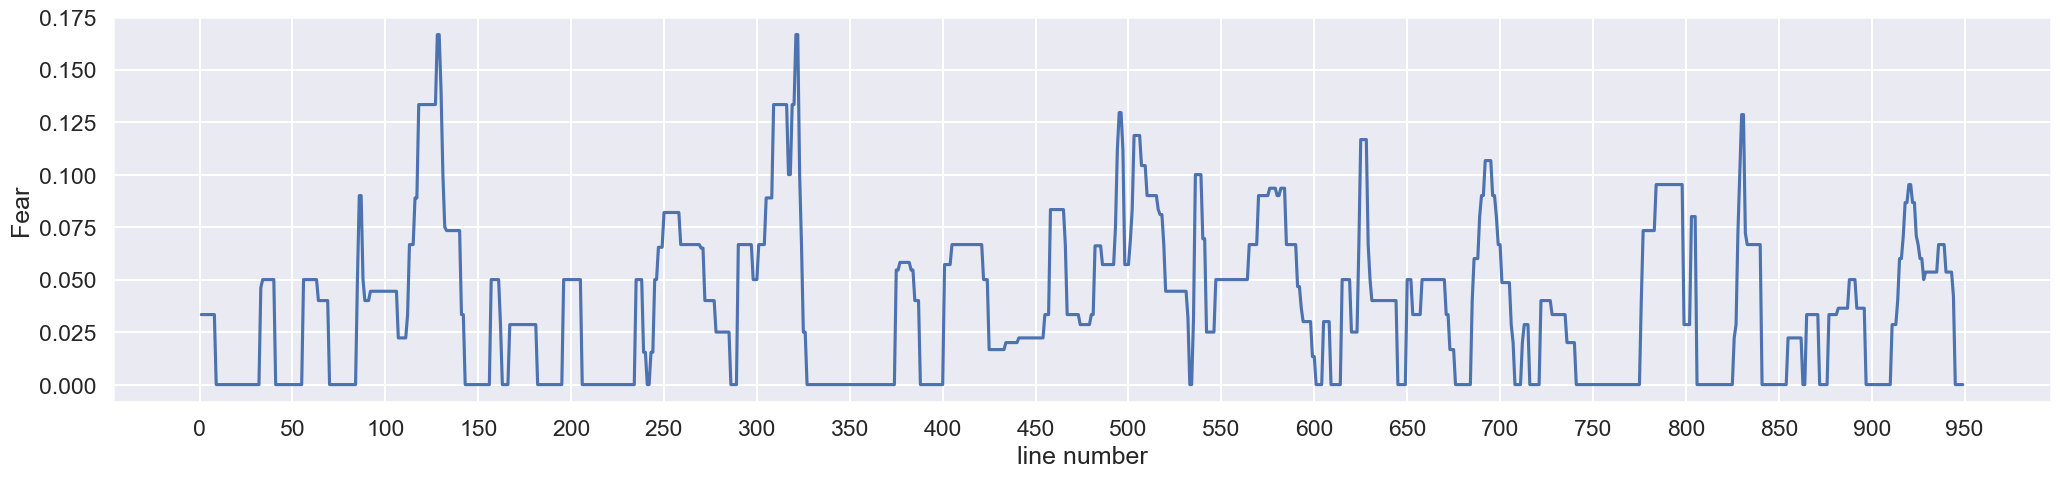

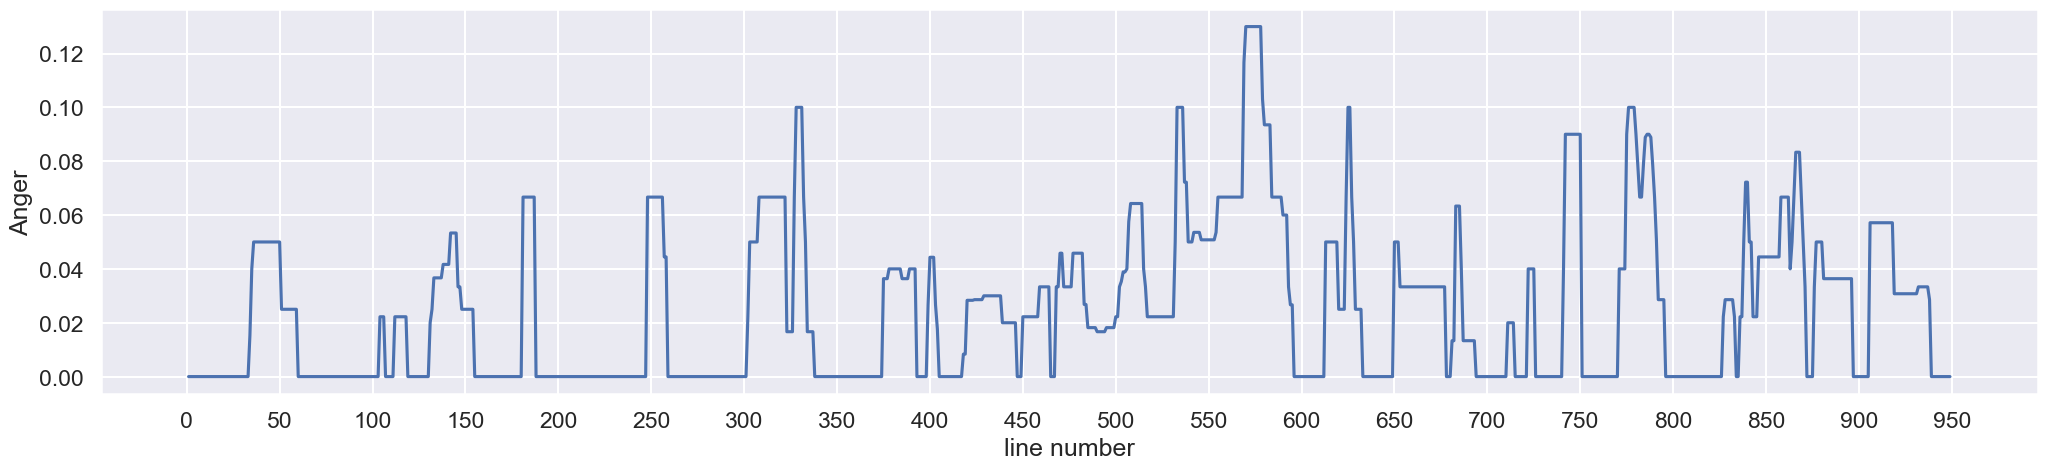

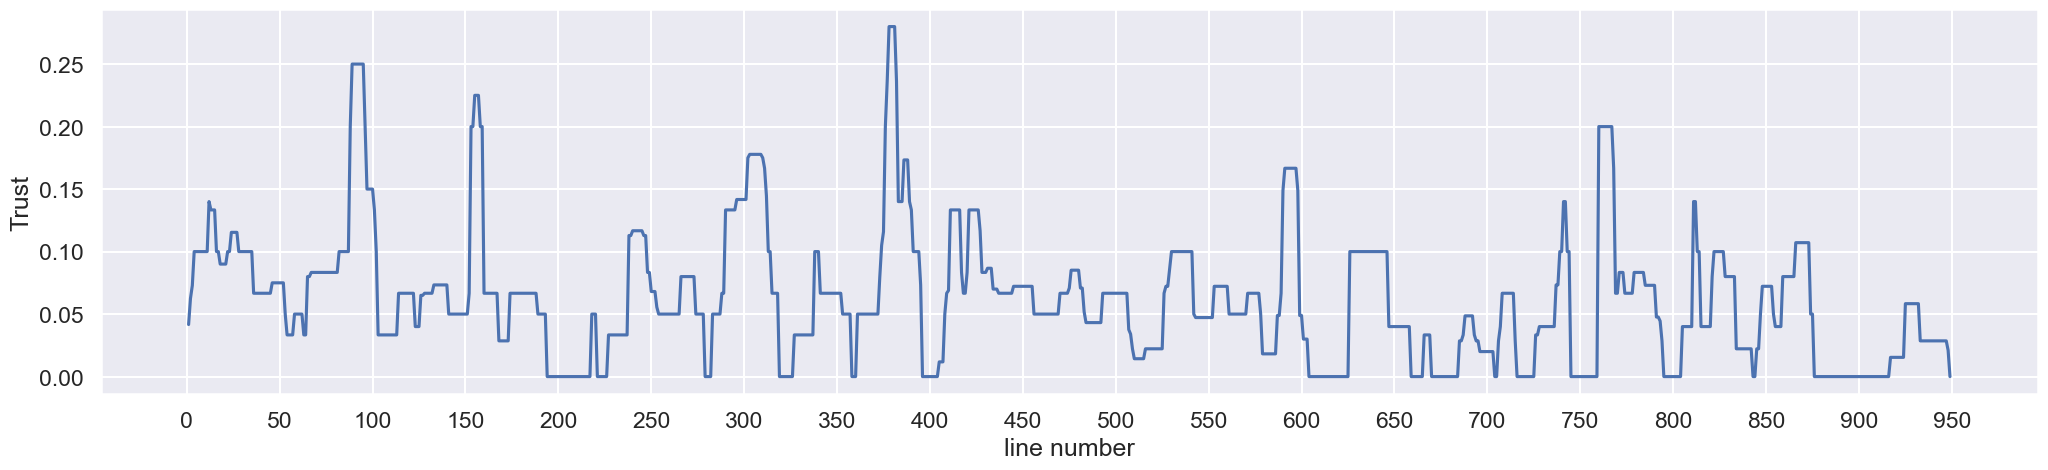

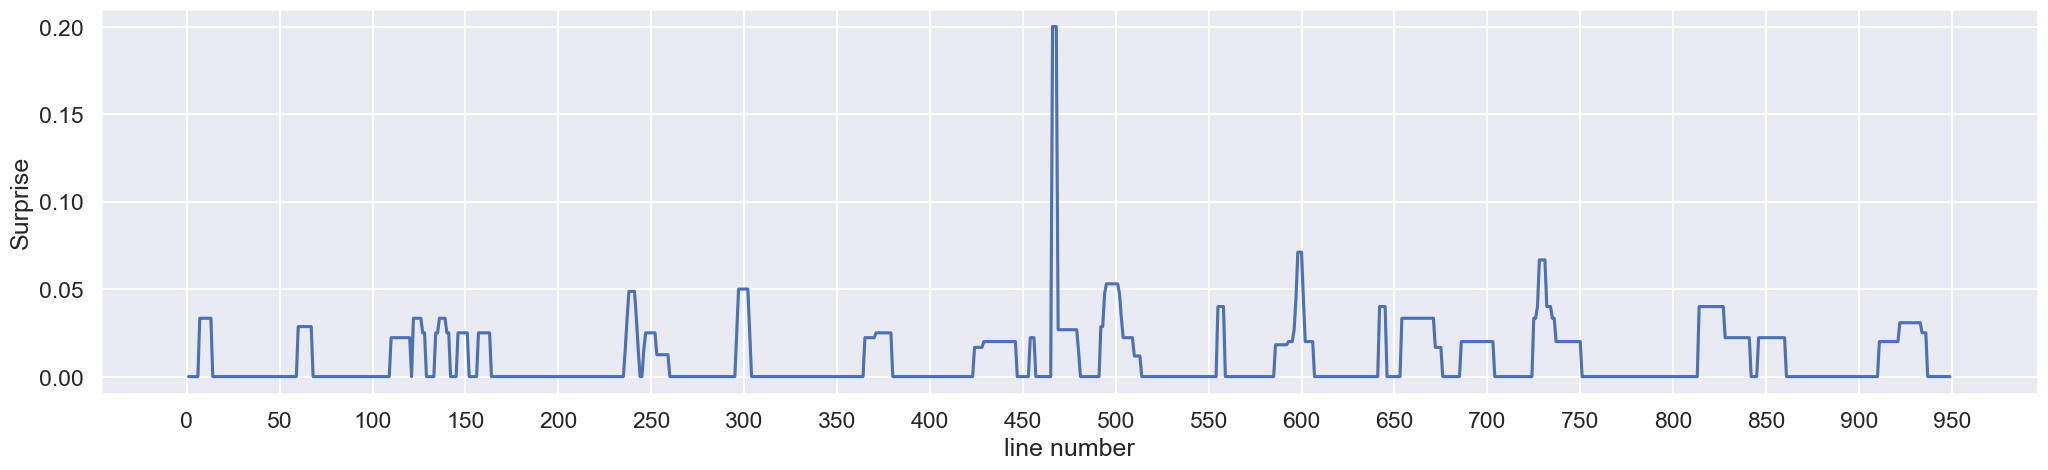

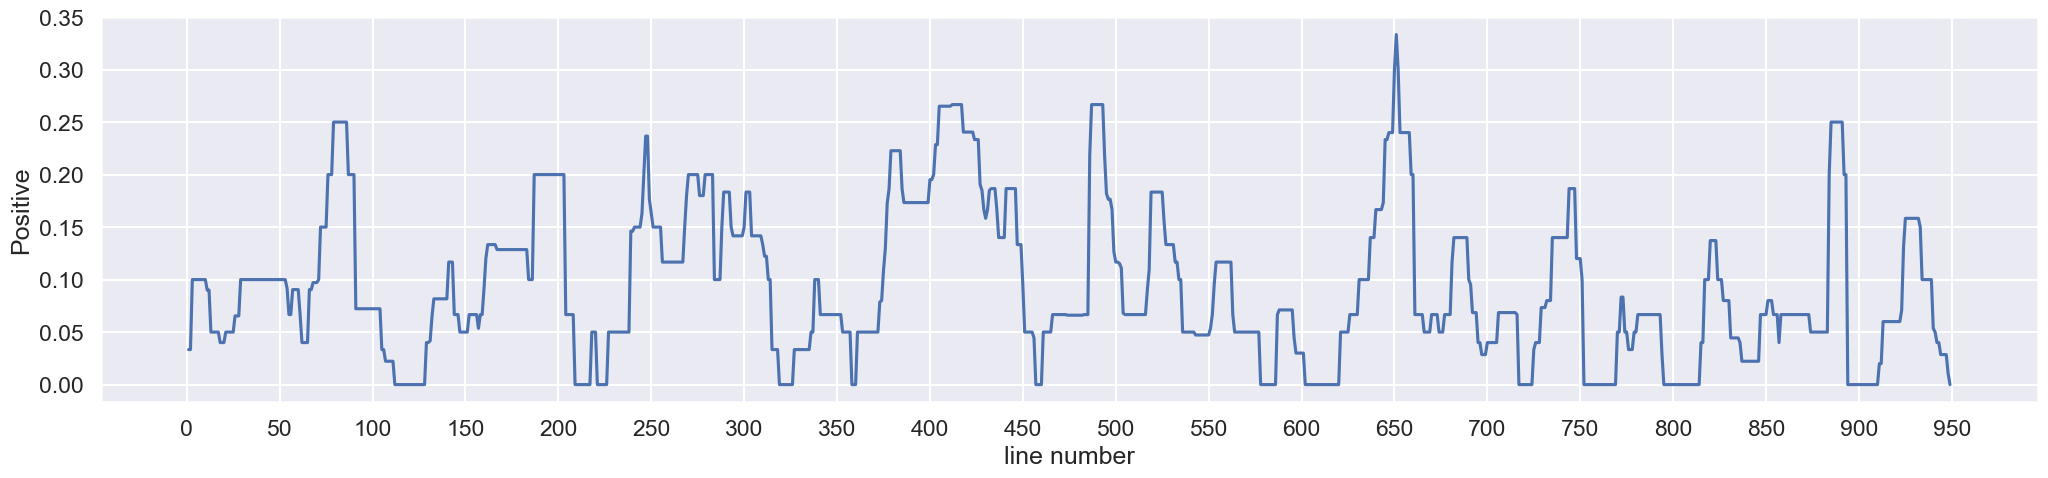

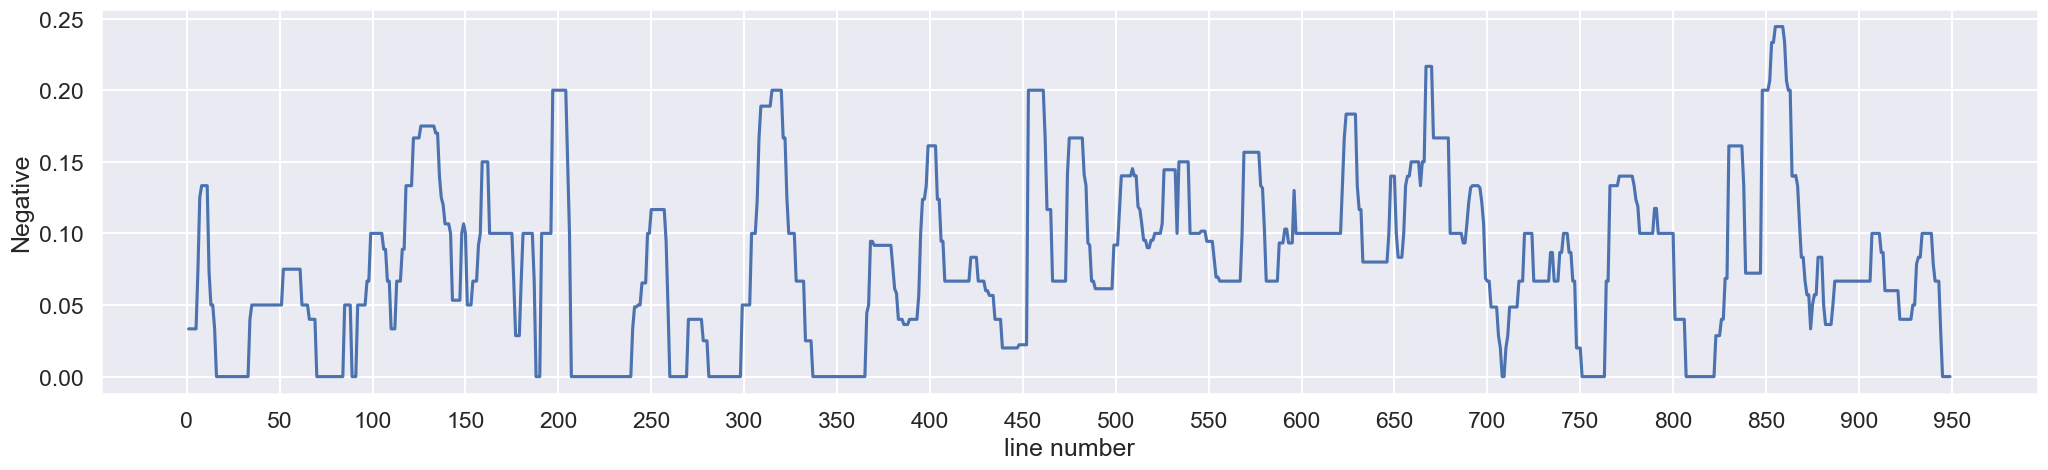

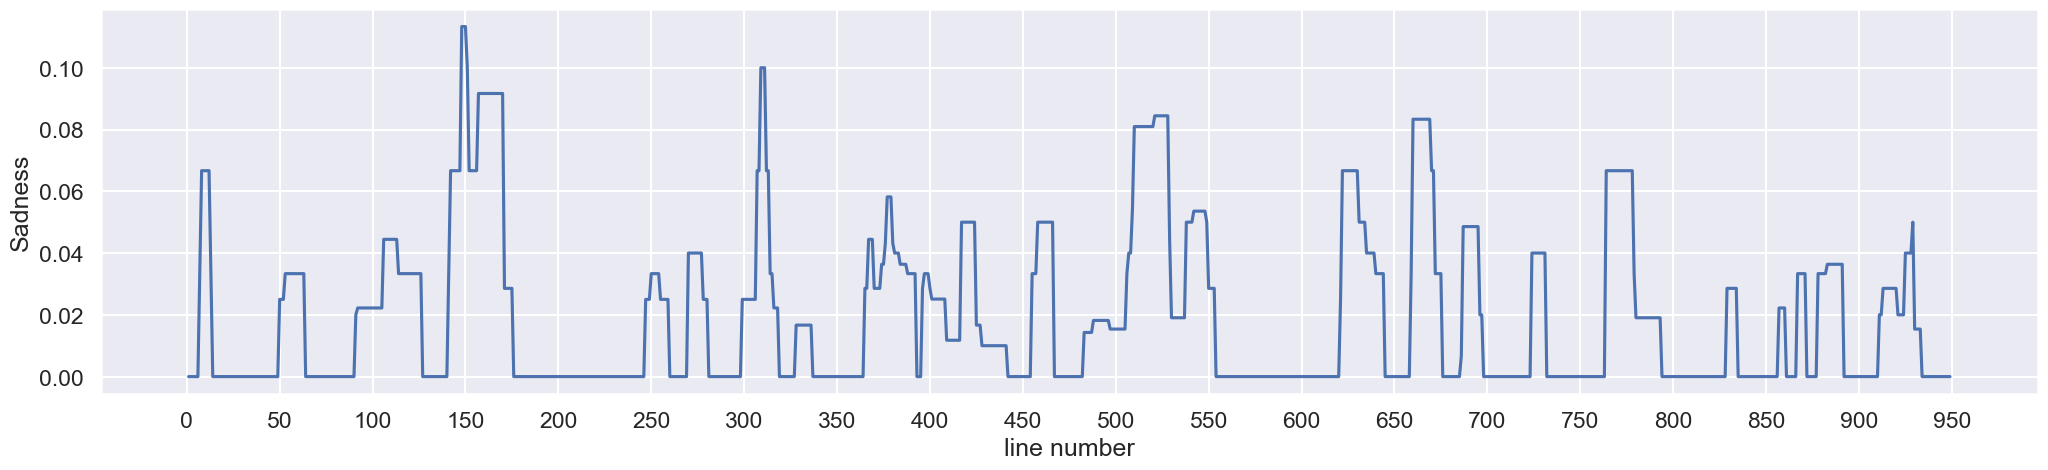

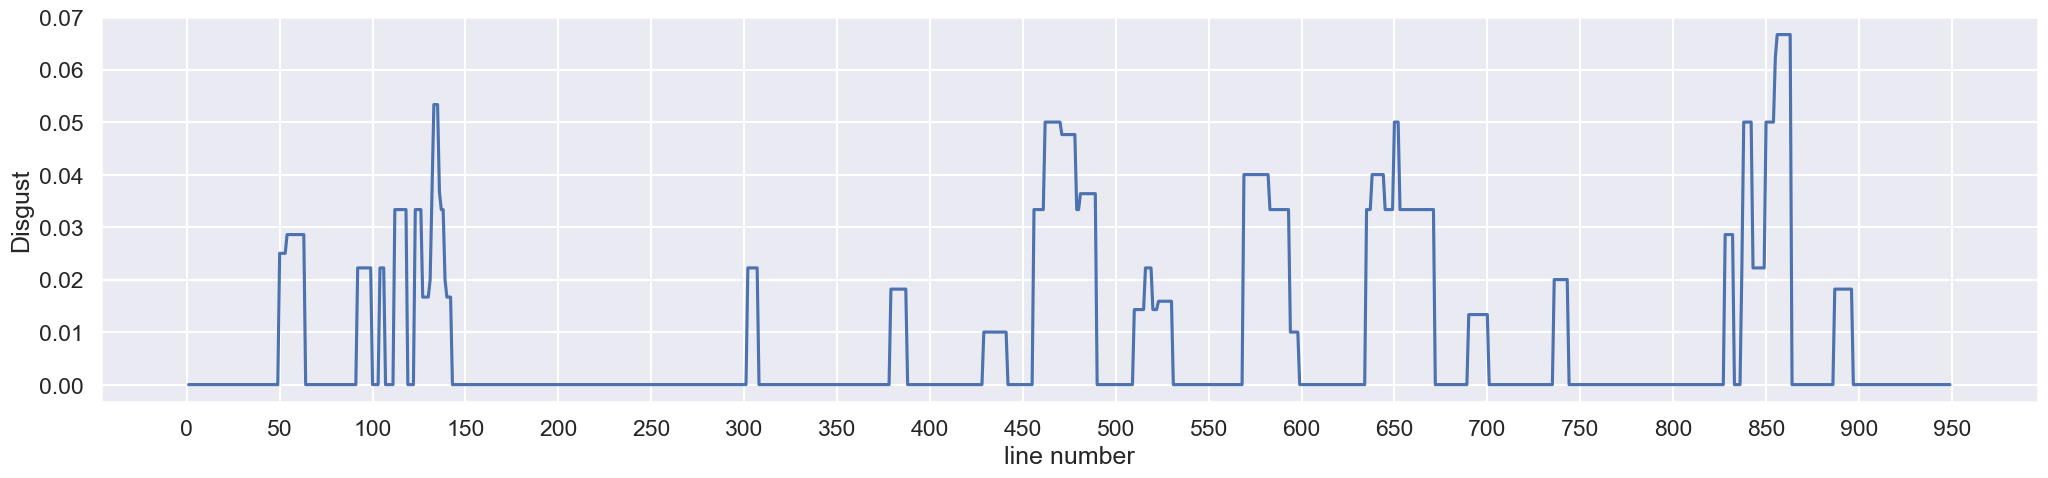

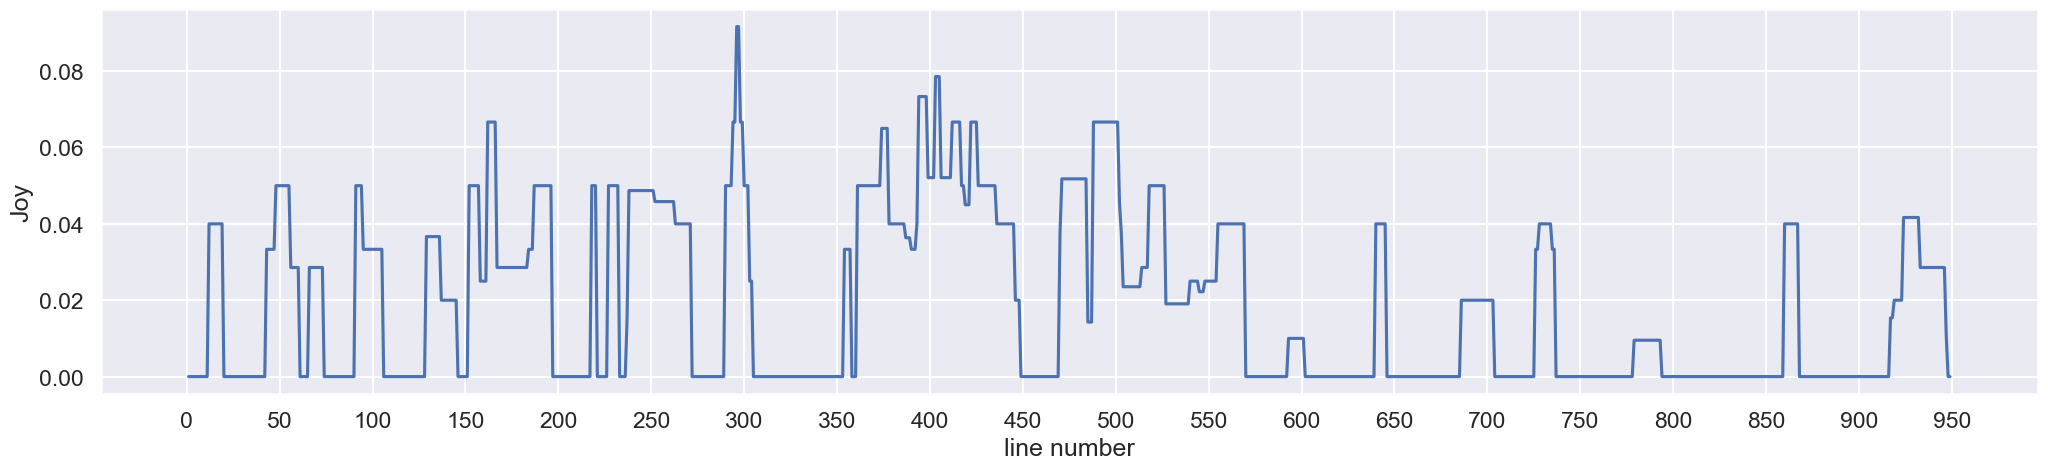

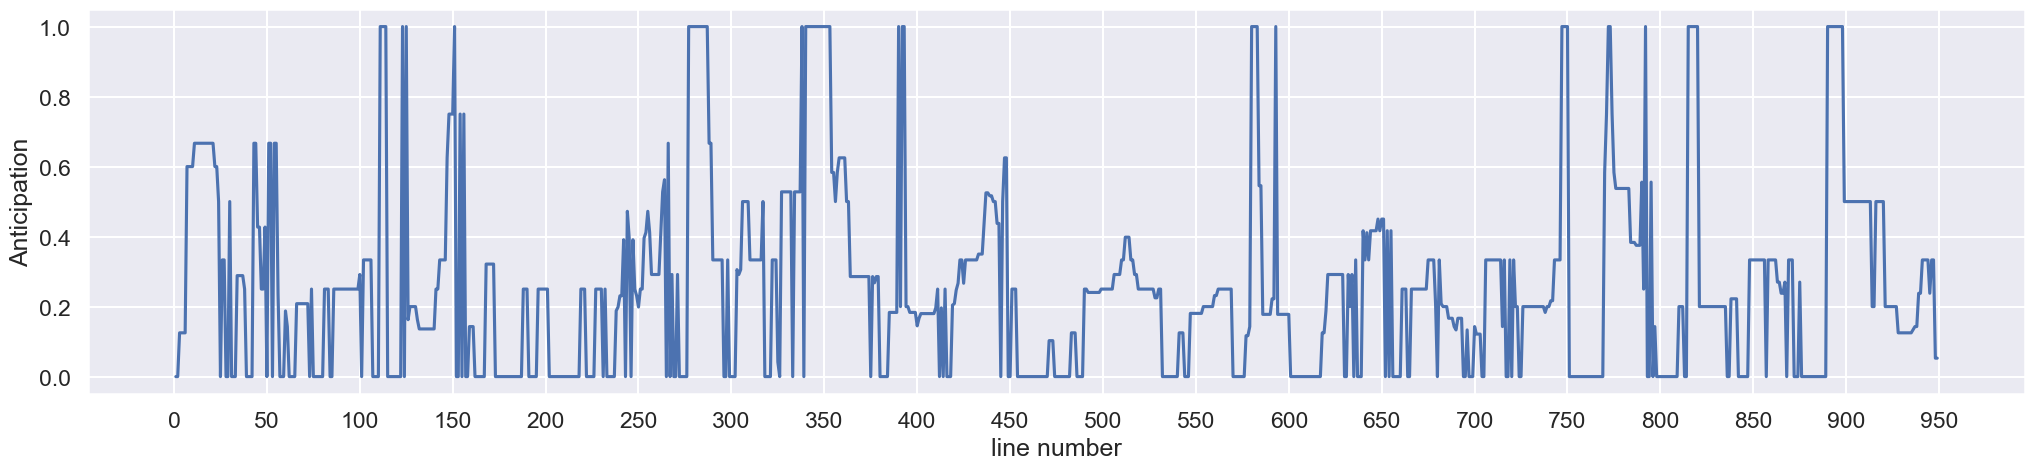

In [83]:
for i in range(27, 37):
    plt.figure(figsize=(25, 5))
    sns.set_context("talk", font_scale=1)
    plot = sns.lineplot(x = 'lineNum', y=nrc.columns[i], data=nrc)
    plt.xticks(np.arange(0, 1000, 50))
    plot.set_xlabel('line number')
    plt.show()

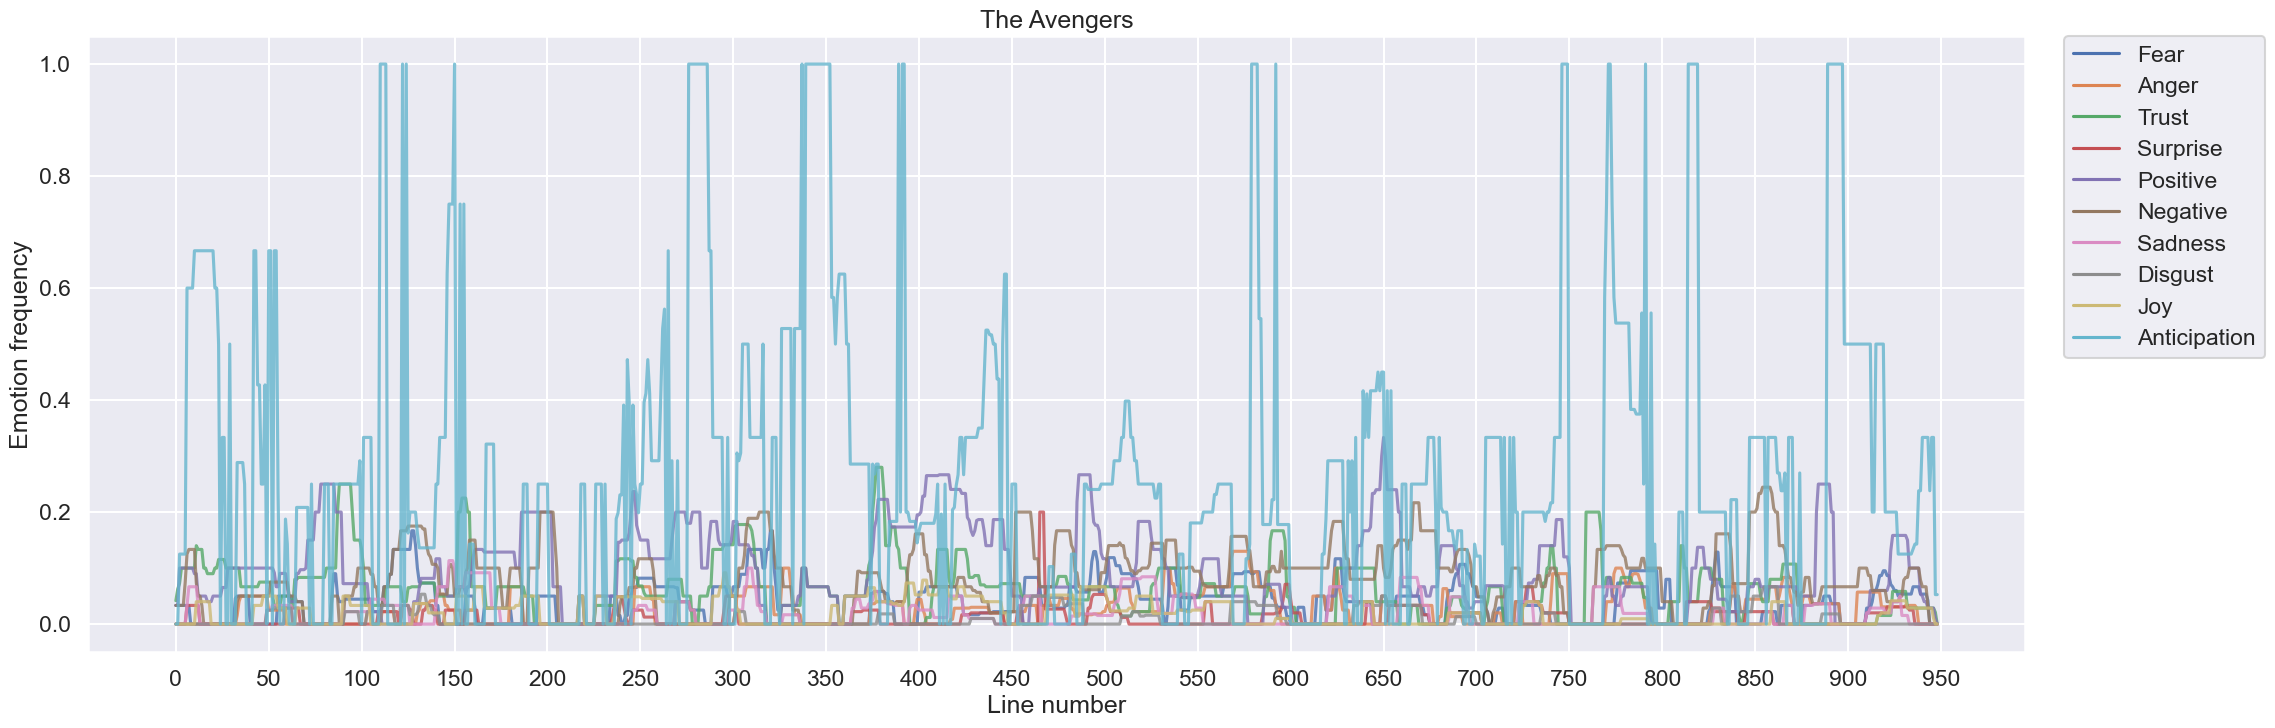

In [84]:
plt.figure(figsize=(25, 8))
sns.set_context("talk", font_scale=1)
sns.lineplot(data=nrc.iloc[:, 27:37], dashes=False, alpha=0.8)
plt.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)
plt.xticks(np.arange(0, 1000, 50))
plt.xlabel('Line number')
plt.ylabel('Emotion frequency')
plt.title('The Avengers')
plt.show()
# plot.legend(loc='upper right')

## Whole movie

<AxesSubplot:title={'center':'The Avengers'}, xlabel='Emotion Frequency', ylabel='Emotion Classification'>

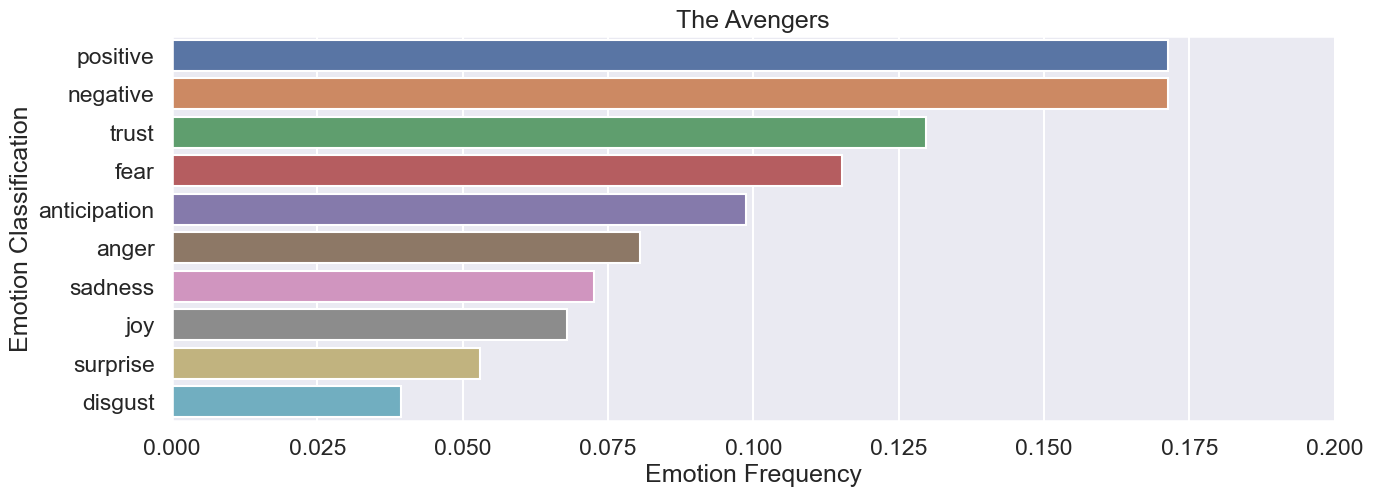

In [85]:
# Emotion frequencies for whole movie
all_line = " ".join(char_line for char_line in nrc['Lemma'])

all_line_text_object = NRCLex(all_line)

frequency_data = all_line_text_object.affect_frequencies
frequency_df = pd.DataFrame.from_dict(frequency_data, orient='index')
frequency_df = frequency_df.reset_index()
frequency_df = frequency_df.rename(columns={'index': 'Emotion Classification', 0:'Emotion Frequency'})
frequency_df = frequency_df.sort_values(by=['Emotion Frequency'], ascending=False)

frequency_df = frequency_df[frequency_df['Emotion Classification'] != 'anticip']

plt.figure(figsize=(15, 5))
plt.title('The Avengers')
plt.xlim([0, 0.2])
sns.set_context("talk", font_scale=0.5)
sns.barplot(x='Emotion Frequency', y='Emotion Classification', data=frequency_df)

<AxesSubplot:title={'center':'The Avengers'}, xlabel='Emotion Count', ylabel='Emotion Classification'>

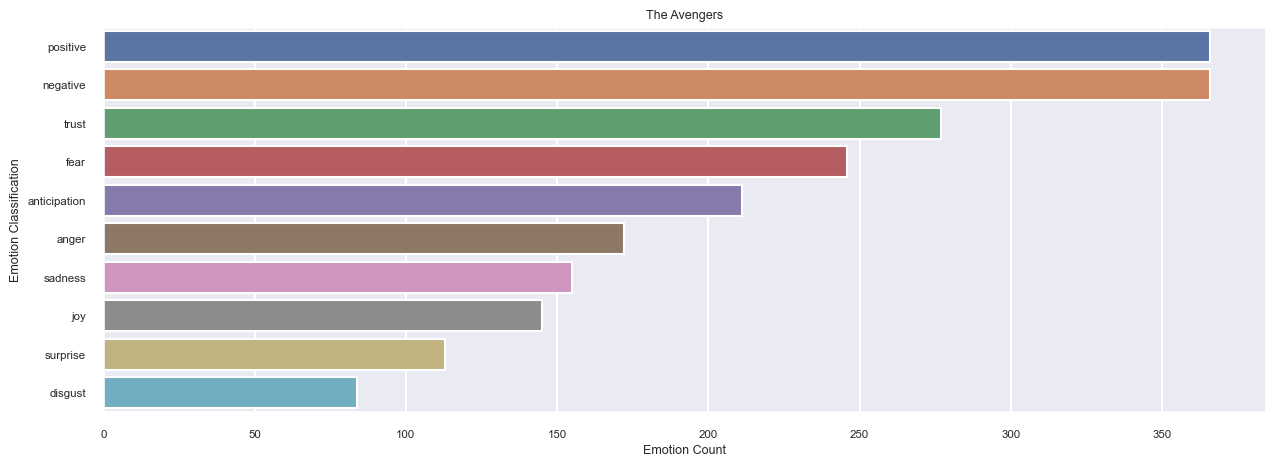

In [86]:
# Emotion frequencies for whole movie
all_line = " ".join(char_line for char_line in nrc['Lemma'])

all_line_text_object = NRCLex(all_line)

score_data = all_line_text_object.raw_emotion_scores
score_df = pd.DataFrame.from_dict(score_data, orient='index')
score_df = score_df.reset_index()
score_df = score_df.rename(columns={'index': 'Emotion Classification', 0:'Emotion Count'})
score_df = score_df.sort_values(by=['Emotion Count'], ascending=False)

score_df

plt.figure(figsize=(15, 5))
plt.title('The Avengers')
sns.set_context("talk", font_scale=1)
sns.barplot(x='Emotion Count', y='Emotion Classification', data=score_df)

In [87]:
# Export csv files
score_df.to_csv(r'/Users/ceciliali/Documents/MSc Data Science/Visual Analytics/coursework_marvel/avengersEmotion.csv',
              index=False)

## By characters

In [88]:
nrc.head()

lineNum       character                                               line  \
0        1       THE OTHER  The Tesseract has awakened. It is on a little ...   
1        2  INTERCOM VOICE  All personnel, evacuation order has been confi...   
2        3       NICK FURY                                     How bad is it?   
3        4    PHIL COULSON  That’s the problem, sir. We don’t know. Doctor...   
4        5       NICK FURY   NASA didn’t authorize Selvig could go to test B.   

                                          clean_line  \
0  The Tesseract has awakened It is on a little w...   
1  All personnel evacuation order has been confir...   
2                                      How bad is it   
3  Thats the problem sir We dont know Doctor Selv...   
4     NASA didnt authorize Selvig could go to test B   

                                          POS tagged  \
0  [(Tesseract, n), (awakened, v), (little, a), (...   
1  [(personnel, n), (evacuation, n), (order, n), ...   
2                                         [(bad, a)]   
3  [(Thats, v), (problem, n), (sir, n), (dont, v)...   
4  [(NASA, n), (didnt, n), (authorize, n), (Selvi...   

                                               Lemma  \
0    Tesseract awaken little world human world wo...   
1    personnel evacuation order confirm Proceed d...   
2                                                bad   
3    Thats problem sir dont know Doctor Selvig re...   
4        NASA didnt authorize Selvig could go test B   

                                text_object      fear  anger     trust  ...  \
0  <nrclex.NRCLex object at 0x7f88e6a129a0>  0.125000  0.125  0.125000  ...   
1  <nrclex.NRCLex object at 0x7f88e6a12a60>  0.000000  0.000  0.000000  ...   
2  <nrclex.NRCLex object at 0x7f88e6a127f0>  0.200000  0.200  0.000000  ...   
3  <nrclex.NRCLex object at 0x7f88e6a12850>  0.166667  0.000  0.166667  ...   
4  <nrclex.NRCLex object at 0x7f88e6a128b0>  0.000000  0.000  1.000000  ...   

       Fear  Anger     Trust  Surprise  Positive  Negative  Sadness  Disgust  \
0  0.033333    0.0  0.041667       0.0  0.033333  0.033333      0.0      0.0   
1  0.033333    0.0  0.062500       0.0  0.033333  0.033333      0.0      0.0   
2  0.033333    0.0  0.072917       0.0  0.100000  0.033333      0.0      0.0   
3  0.033333    0.0  0.100000       0.0  0.100000  0.033333      0.0      0.0   
4  0.033333    0.0  0.100000       0.0  0.100000  0.033333      0.0      0.0   

   Joy  Anticipation  
0  0.0         0.000  
1  0.0         0.000  
2  0.0         0.125  
3  0.0         0.125  
4  0.0         0.125  

[5 rows x 37 columns]

In [89]:
char_most_line = ['TONY STARK', 'THOR', 'LOKI', 'STEVE ROGERS', 'BRUCE BANNER', 'NATASHA ROMANOFF']

In [90]:
# Initiate dataframe
char_df = pd.DataFrame()

for char in char_most_line:
    all_line = nrc.loc[nrc['character'] == char]['Lemma']
    text_object = NRCLex(" ".join(line for line in all_line))
    
    score_data = text_object.affect_frequencies

    score_df = pd.DataFrame.from_dict(score_data, orient='index')
    score_df = score_df.reset_index()
    score_df = score_df.rename(columns={'index': 'Emotion Classification', 0:'Emotion Frequency'})
    score_df['character'] = char
    char_df = char_df.append(score_df, ignore_index=True)

In [91]:
char_df = char_df[char_df['Emotion Classification'] != 'anticip']

Text(0.5, 1.0, 'The Avengers')

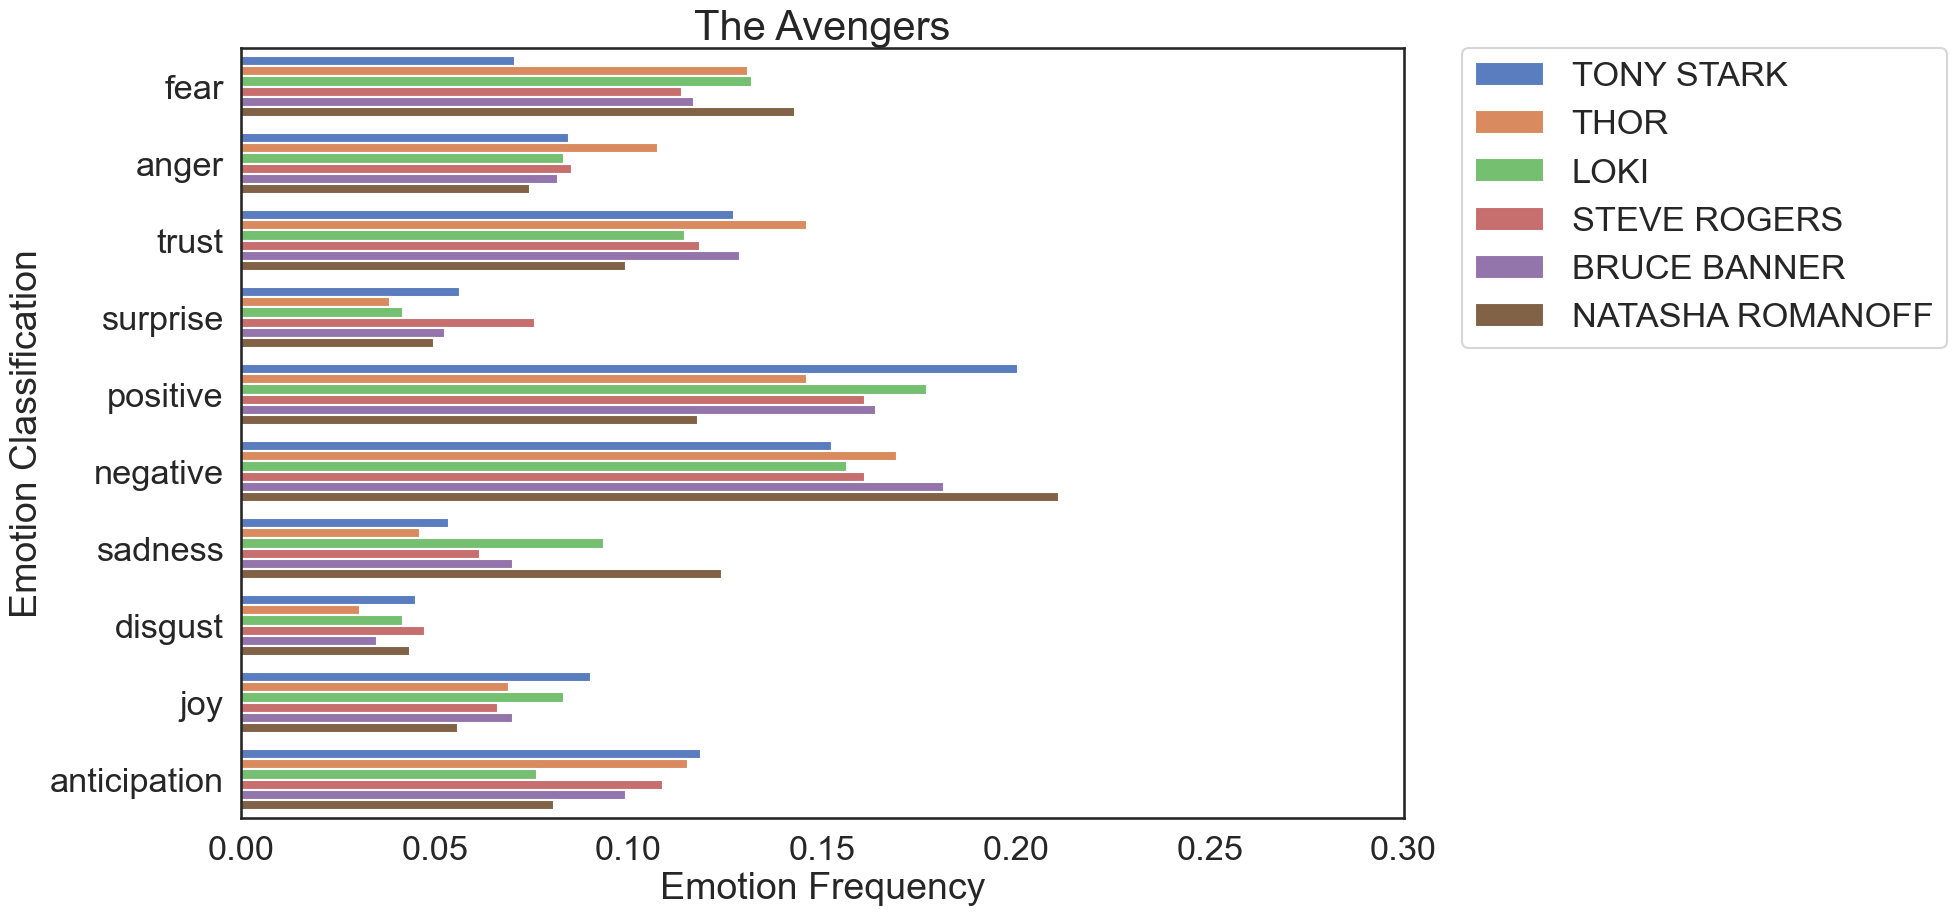

In [92]:
plt.figure(figsize=(15, 10))
sns.set_style("white")
sns.set_context("talk", font_scale=1.5)
sns.barplot(x='Emotion Frequency', y='Emotion Classification', palette='muted', hue='character', data=char_df)

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlim([0, 0.3])
plt.title('The Avengers', fontsize=30)

In [93]:
# Export csv files
char_df.to_csv(r'/Users/ceciliali/Documents/MSc Data Science/Visual Analytics/coursework_marvel/avengersCharDF.csv',
              index=False)

# Test

In [94]:
for char in char_most_line:
    all_line = nrc.loc[nrc['character'] == char]['Lemma']
    all_line_sentence = " ".join(line for line in all_line)
    all_line_token = word_tokenize(all_line_sentence)
    allWordDist = nltk.FreqDist(w.lower() for w in all_line_token)
    mostCommon = allWordDist.most_common(10)
    print(char, ':\n', mostCommon)
#     score_data = text_object.affect_frequencies

#     score_df = pd.DataFrame.from_dict(score_data, orient='index')
#     score_df = score_df.reset_index()
#     score_df = score_df.rename(columns={'index': 'Emotion Classification', 0:'Emotion Frequency'})
#     score_df['character'] = char
#     char_df = char_df.append(score_df, ignore_index=True)

TONY STARK :
 [('get', 23), ('im', 21), ('well', 10), ('yeah', 10), ('come', 9), ('thing', 9), ('know', 9), ('want', 9), ('like', 8), ('na', 8)]
THOR :
 [('loki', 8), ('tesseract', 6), ('think', 4), ('together', 4), ('earth', 4), ('come', 4), ('people', 4), ('hes', 4), ('look', 3), ('brother', 3)]
LOKI :
 [('know', 6), ('tell', 6), ('dont', 5), ('ive', 5), ('make', 5), ('oh', 5), ('power', 5), ('think', 5), ('come', 4), ('world', 4)]
STEVE ROGERS :
 [('get', 17), ('stark', 14), ('need', 10), ('put', 9), ('im', 9), ('know', 7), ('na', 7), ('us', 7), ('suit', 7), ('time', 6)]
BRUCE BANNER :
 [('know', 9), ('get', 7), ('dont', 7), ('well', 6), ('thats', 5), ('guy', 5), ('tell', 5), ('im', 5), ('want', 4), ('oh', 4)]
NATASHA ROMANOFF :
 [('na', 13), ('get', 11), ('gon', 10), ('know', 9), ('im', 7), ('dont', 7), ('come', 6), ('loki', 6), ('doctor', 5), ('like', 5)]


## N-gram

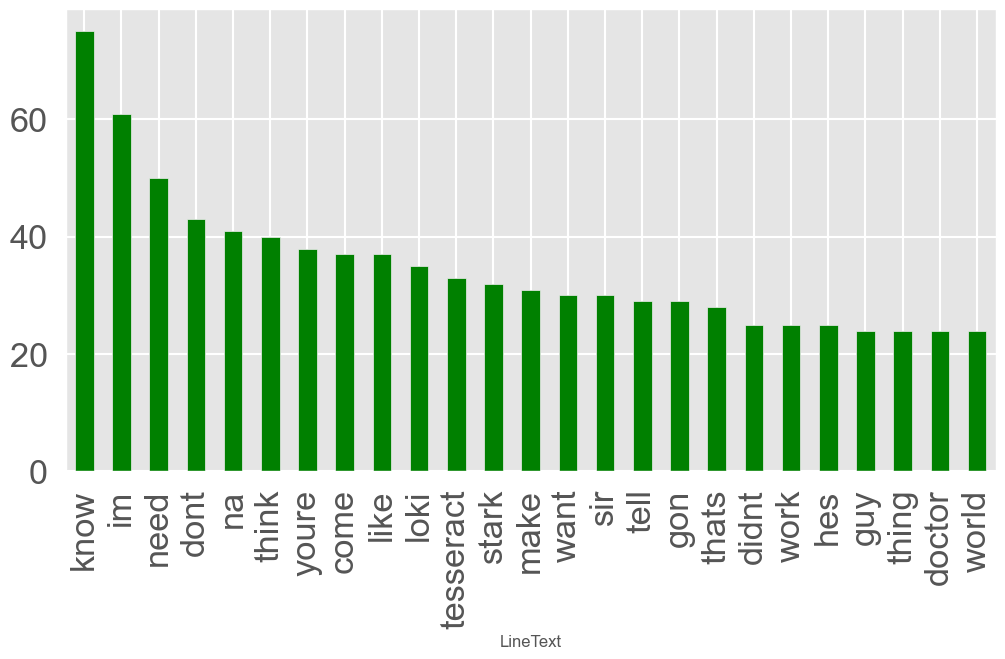

In [95]:
from sklearn.feature_extraction.text import CountVectorizer

def get_top_n_words(corpus, n=None):
    vec = CountVectorizer(stop_words = 'english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

mpl.style.use('ggplot')
common_words = get_top_n_words(script['Lemma'], 25)
df1 = pd.DataFrame(common_words, columns = ['LineText' , 'count'])
plt.figure(figsize=(12,6))
df1.groupby('LineText').sum()['count'].sort_values(ascending=False).plot.bar(color='green')
plt.show()

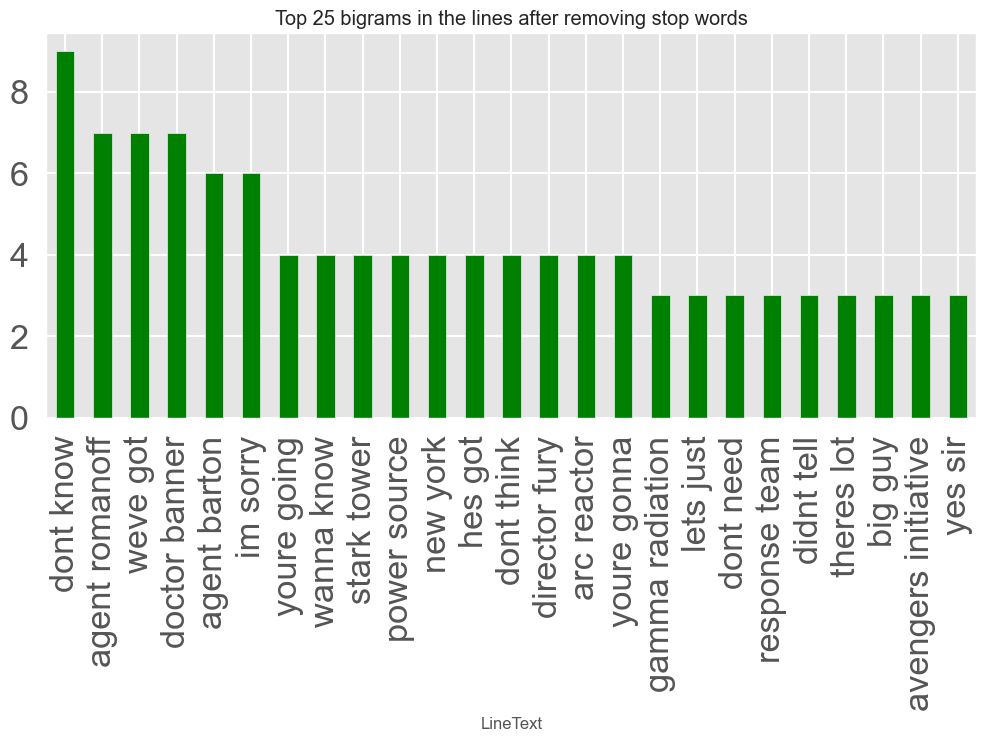

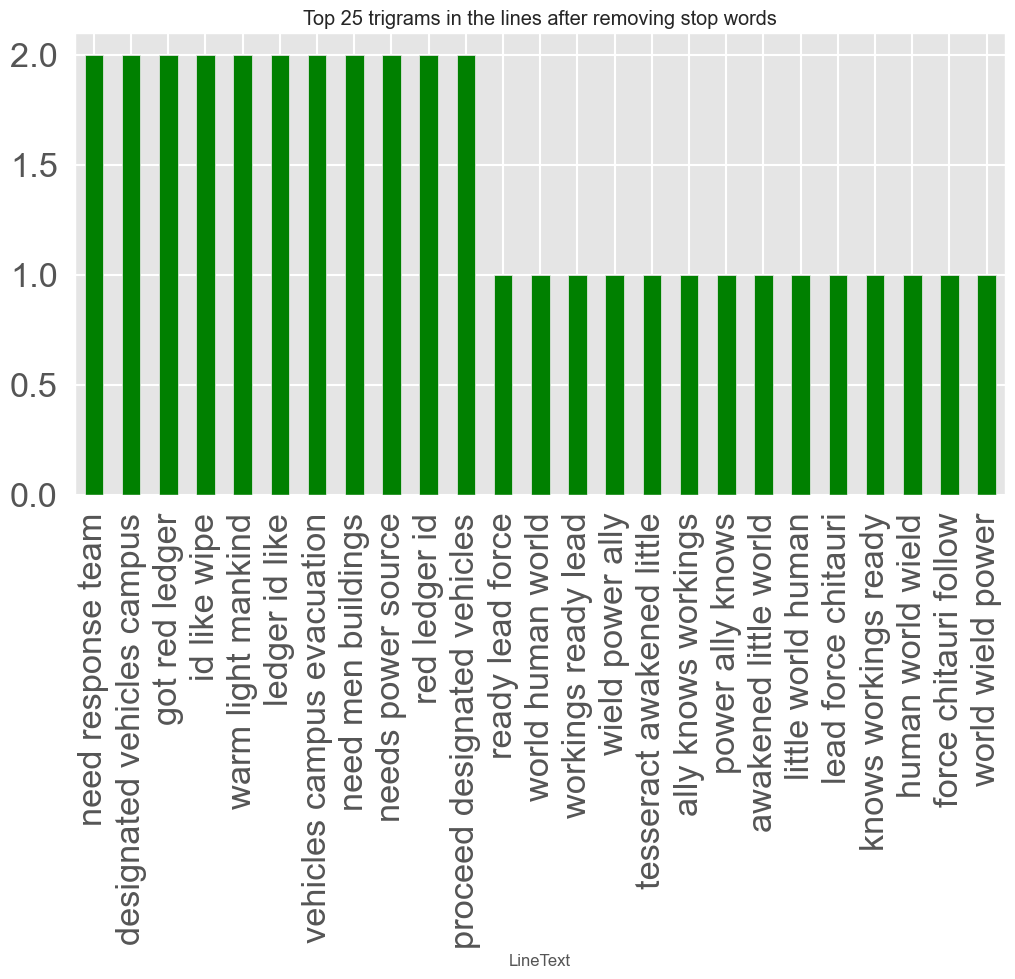

In [96]:
def get_top_k_n_gram(corpus, k=None, n=None):
    vec = CountVectorizer(ngram_range=(n, n), stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:k]

common_bigrams = get_top_k_n_gram(script['clean_line'], 25,2)
df3 = pd.DataFrame(common_bigrams, columns = ['LineText' , 'count'])
plt.figure(figsize=(12,5))
df3.groupby('LineText').sum()['count'].sort_values(ascending=False).plot.bar(
    title='Top 25 bigrams in the lines after removing stop words',color='green')
plt.show()

common_trigrams = get_top_k_n_gram(script['clean_line'], 25,3)
df3 = pd.DataFrame(common_trigrams, columns = ['LineText' , 'count'])
plt.figure(figsize=(12,6))
df3.groupby('LineText').sum()['count'].sort_values(ascending=False).plot.bar(
    title='Top 25 trigrams in the lines after removing stop words',color='green')
plt.show()